# Fashion MNIST Image Classification - Black and White

Name: Soh Hong Yu<br/><br/>
Admin Number: P2100775<br/><br/>
Class: DAAA/FT/2B/01<br/><br/>
Module Code: ST1504 Deep Learning<br/>

<hr>
<h3>References (In Harvard format):</h3>
<ol>
  <li>Team, K. (2022) Keras Documentation: Fashion Mnist Dataset, an alternative to mnist, Keras. <br/>Available at: <a href="https://keras.io/api/datasets/fashion_mnist/">https://keras.io/api/datasets/fashion_mnist/</a> (Accessed: October 17, 2022). </li>
  <li>User, D. (2022) An overview of state of the art (SOTA) deep neural networks (dnns), Deci. <br/>Available at: <a href="https://deci.ai/blog/sota-dnns-overview/">https://deci.ai/blog/sota-dnns-overview/</a> (Accessed: November 19, 2022). </li>
  <li>Cox, S. (2021) The overlooked technique of image averaging, Photography Life. <br/>Available at: <a href="https://photographylife.com/image-averaging-technique">https://photographylife.com/image-averaging-technique</a> (Accessed: November 19, 2022). </li>
  <li>Gupta, A. et al. (2021) Adam vs. SGD: Closing the generalization gap on Image Classiﬁcation, Adam vs. SGD: Closing the generalization gap on image classification. <br/>Available at: <a href="https://www.opt-ml.org/papers/2021/paper53.pdf">https://www.opt-ml.org/papers/2021/paper53.pdf</a> (Accessed: November 19, 2022). </li>
  <li>Nelson, J. (2020) Why and how to implement random crop data augmentation, Roboflow Blog. Roboflow Blog. <br/>Available at: <a href="https://blog.roboflow.com/why-and-how-to-implement-random-crop-data-augmentation">https://blog.roboflow.com/why-and-how-to-implement-random-crop-data-augmentation</a> (Accessed: November 19, 2022). </li>
  <li>Zvornicanin, E. (2022) Convolutional Neural Network vs. Regular Neural Network, Baeldung on Computer Science. <br/>Available at: <a href="https://www.baeldung.com/cs/convolutional-vs-regular-nn">https://www.baeldung.com/cs/convolutional-vs-regular-nn</a> (Accessed: November 19, 2022). </li>
  <li>Baker, J. (2021) 8.2. networks using blocks (VGG)¶ <br/>Available at: <a href="https://d2l.ai/chapter_convolutional-modern/vgg.html">https://d2l.ai/chapter_convolutional-modern/vgg.html</a> (Accessed: November 19, 2022). </li>
  <li>Shinde, Y. (2021) How to code your resnet from scratch in tensorflow? , Analytics Vidhya. <br/>Available at: <a href="https://www.analyticsvidhya.com/blog/2021/08/how-to-code-your-resnet-from-scratch-in-tensorflow">https://www.analyticsvidhya.com/blog/2021/08/how-to-code-your-resnet-from-scratch-in-tensorflow</a> (Accessed: November 19, 2022). </li>
  <li>Baker, J. (2021) 8.6. residual networks (ResNet) <br/>Available at: <a href="https://d2l.ai/chapter_convolutional-modern/resnet.html">https://d2l.ai/chapter_convolutional-modern/resnet.html</a> (Accessed: November 19, 2022). </li>
  <li>Fashion-MNIST: a Novel Image Dataset for Benchmarking Machine Learning Algorithms. Han Xiao, Kashif Rasul, Roland Vollgraf. arXiv:1708.07747</li>
</ol>


# Project Objective

Implement an image classifier using a deep learning network


# Background Information


With new fashion trends rising daily, being able to categories fashion outfits can be ways to help consumers buy what they want to get.

Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. Zalando intends Fashion-MNIST to serve as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms. It shares the same image size and structure of training and testing splits.

The original MNIST dataset contains a lot of handwritten digits. Members of the AI/ML/Data Science community love this dataset and use it as a benchmark to validate their algorithms. In fact, MNIST is often the first dataset researchers try. "If it doesn't work on MNIST, it won't work at all", they said. "Well, if it does work on MNIST, it may still fail on others."

Zalando seeks to replace the original MNIST dataset


# Initialising Libraries and Variables


In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from keras.utils import to_categorical
import keras_tuner as kt
import visualkeras
from keras.regularizers import l1, l2
from keras.layers import AveragePooling2D, ZeroPadding2D, BatchNormalization, Activation, MaxPool2D, Add
from keras.models import Sequential
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Normalization, Dense, Conv2D, Dropout, BatchNormalization, ReLU
from keras.models import Sequential
from keras.models import Model
from keras import Input
from keras.optimizers import *
from keras.callbacks import EarlyStopping


In [3]:
# Fix random seed for reproducibility
seed = 88
np.random.seed(seed)


# Checking GPU


In [4]:
# Check if Cuda GPU is available
tf.config.list_physical_devices('GPU')


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

# Loading Datasets


In [5]:
df = tf.keras.datasets.fashion_mnist.load_data()


In [6]:
(x_train_val, y_train_val), (x_test, y_test) = df


As the training set will be used to train the model, we will need a set of data for model tuning, and the testing set will be used to evaluate the final model, ensuring the model is generalise and not overfit to the validation set due to model tuning.

To decide what size of the validation set, I have decided to split the data by 80:20 of the train set as the validation set.

Training set - 48000<br/>
Validation set - 12000<br/>
Testing set - 10000<br/>


In [7]:
train_size = 48000
x_train, y_train = x_train_val[:train_size], y_train_val[:train_size]
x_val, y_val = x_train_val[train_size:], y_train_val[train_size:]


# Exploratory Data Analysis

We will begin by conducting an exploratory data analysis of the data, to gain a better understanding of the characteristics of the dataset.


x_train: uint8 NumPy array of grayscale image data with shapes (48000, 28, 28), containing the training data.

y_train: uint8 NumPy array of labels (integers in range 0-9) with shape (48000,) for the training data.

x_val: uint8 NumPy array of grayscale image data with shapes (12000, 28, 28), containing the validation data.

y_val: uint8 NumPy array of labels (integers in range 0-9) with shape (12000,) for the validation data.

x_test: uint8 NumPy array of grayscale image data with shapes (10000, 28, 28), containing the test data.

y_test: uint8 NumPy array of labels (integers in range 0-9) with shape (10000,) for the test data.


There are 10 different type of labels in the dataset. From the dataset, each value represent an item. The following list is the description of each value.

Item Labels

- 0 : T-shirt/top
- 1 : Trouser
- 2 : Pullover
- 3 : Dress
- 4 : Coat
- 5 : Sandal
- 6 : Shirt
- 7 : Sneaker
- 8 : Bag
- 9 : Ankle boot


In [8]:
# class labels
class_labels = {
    0: "T-shirt/top",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle boot"
}

NUM_CLASS = 10


Each image is a 28x28 image as well as only a single color channel (grayscale image). Therefore, we can set the IMG_SIZE as a tuple (28, 28, 1)


In [9]:
IMG_SIZE = (28, 28, 1)


### Visualising the Dataset

Let's look at what the images look like.


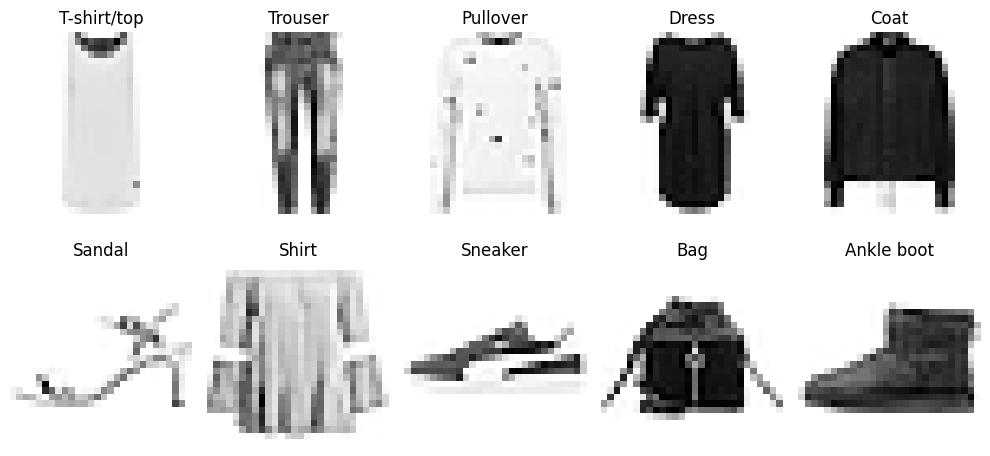

In [10]:
fig, ax = plt.subplots(2, 5, figsize=(10, 5), tight_layout=True)

for label, subplot in enumerate(ax.ravel()):
    subplot.axis("off")
    subplot.imshow(x_train[y_train == label][np.random.randint(
        0, len(x_train[y_train == label]))], cmap='Greys')
    subplot.set_title(class_labels[label])

plt.show()


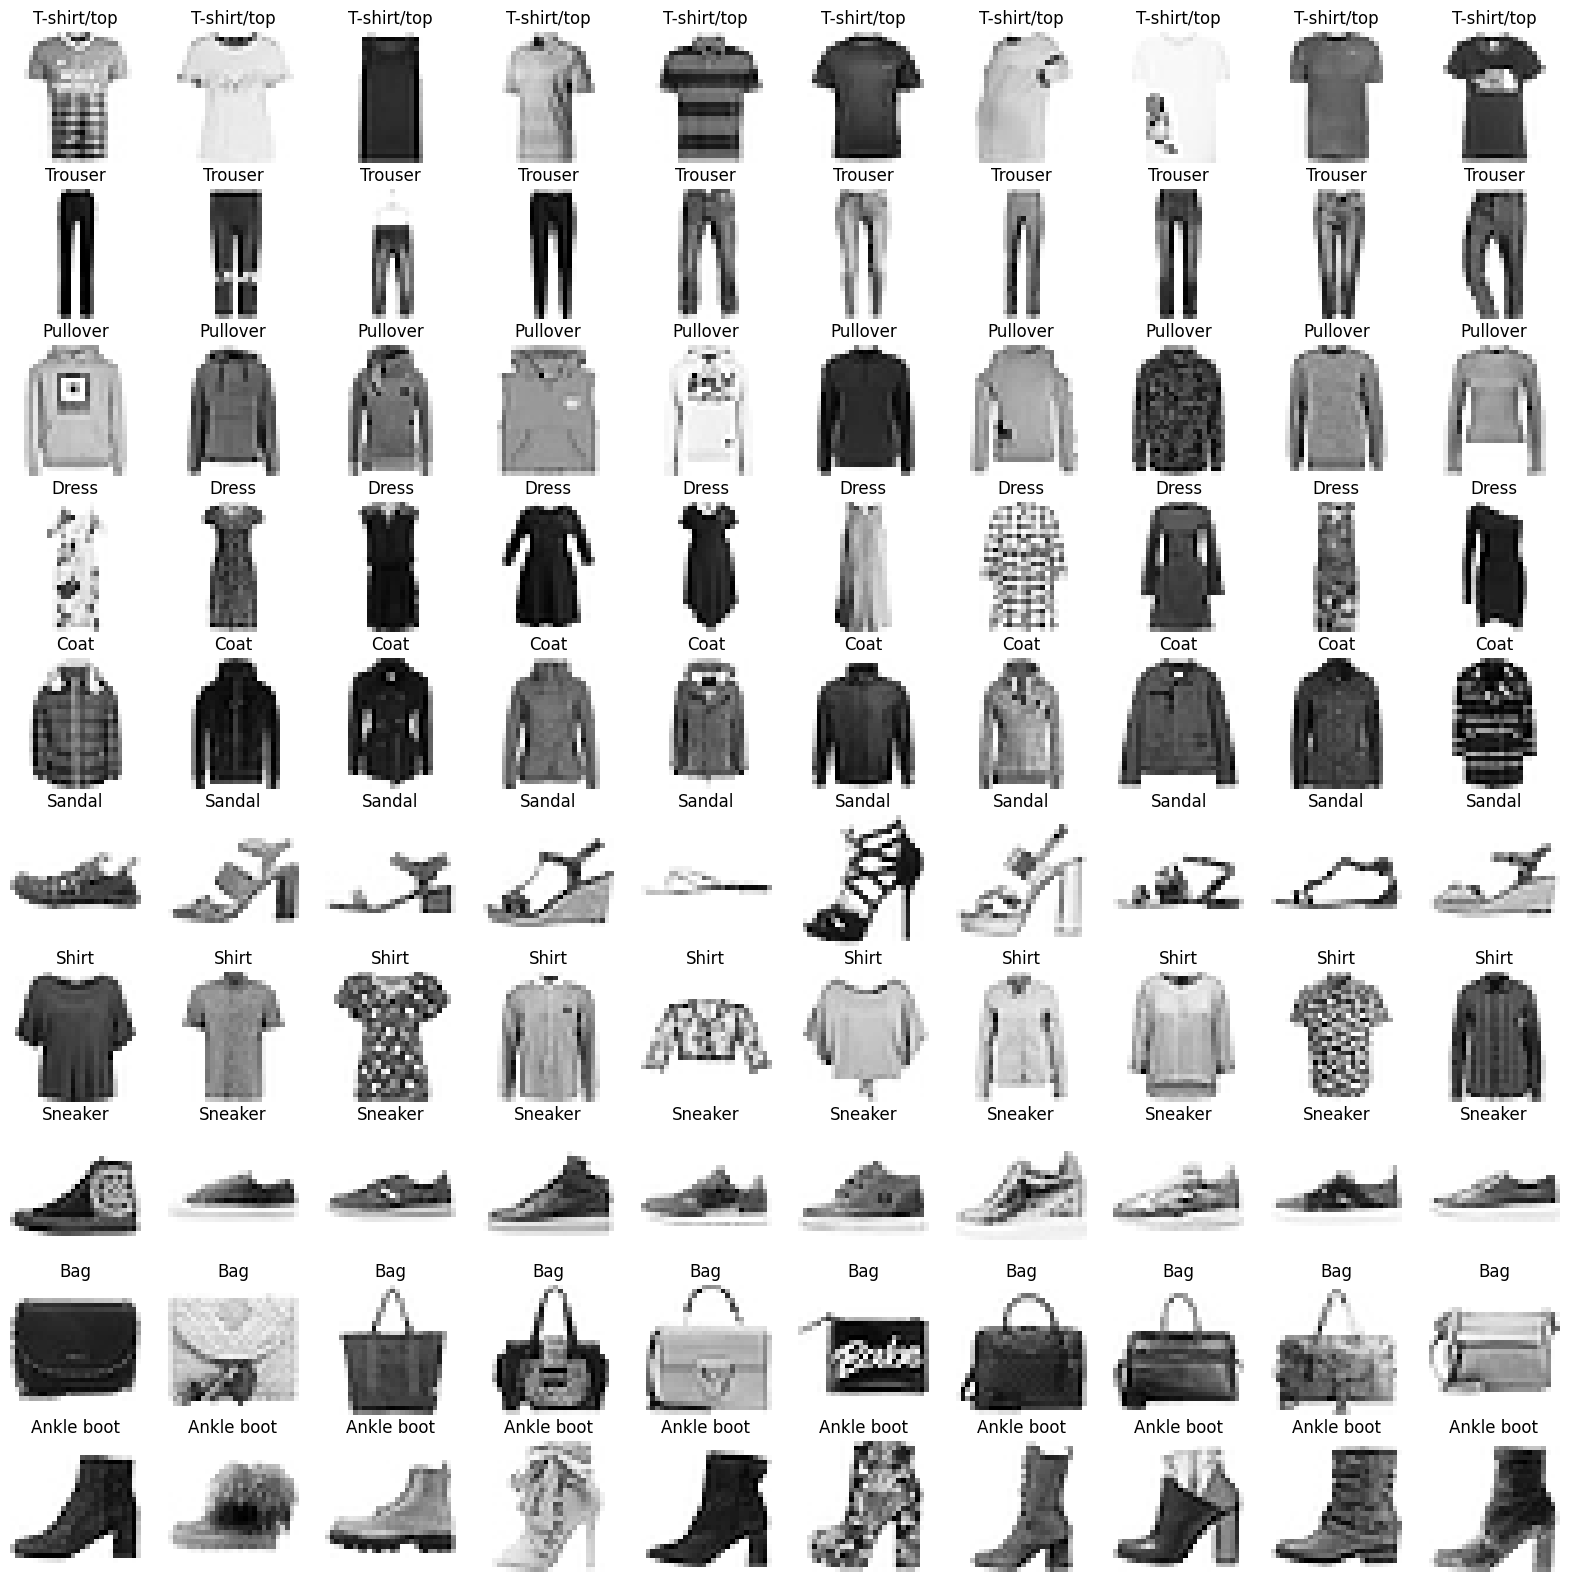

In [11]:
fig, ax = plt.subplots(10, 10, figsize=(20, 20))
for i in range(10):
    images = x_train[np.squeeze(y_train == i)]
    random_index = np.random.choice(images.shape[0], 10, replace=False)
    images = images[random_index]
    label = class_labels[i]
    for j in range(10):
        subplot = ax[i, j]
        subplot.axis("off")
        subplot.imshow(images[j], cmap='Greys')
        subplot.set_title(label)

plt.show()


<u><b>Observations</b></u>

- Zalando is very consistent in the orientation of the images.
  - The shoes always seem to have their tip pointing to the left
- Data augmentation where images can be flipped could be possible to do better prediction
- The images are zoomed in so that the entire image is only the item.
- Based on the selection of images which are 10 from each class [Total 100 samples], there is no clear indication of missed identified items from the dataset. [No extra cleaning/data labelling is required]


### Class Distribution

When training a machine learning model, it is always important to check the distribution of the different classes in the dataset. This will inform us which metrics is the best to use and if anything is needed to balance the classes.


In [12]:
labels, counts = np.unique(y_train, return_counts=True)
for label, count in zip(labels, counts):
    print(f"{class_labels[label]}: {count}")


T-shirt/top: 4764
Trouser: 4794
Pullover: 4768
Dress: 4796
Coat: 4785
Sandal: 4806
Shirt: 4851
Sneaker: 4820
Bag: 4820
Ankle boot: 4796


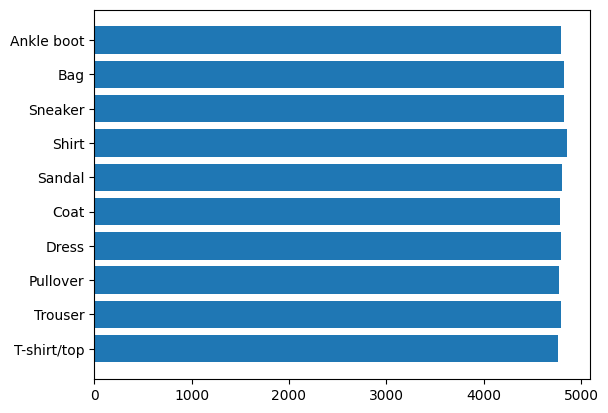

In [13]:
plt.barh(labels, counts, tick_label=list(class_labels.values()))
plt.show()


<u><b>Observations</b></u>

As we can see from the bar graph, the distribution of the images is even. This suggest that accuracy can be use as a primary metric.


### Image Pixel Distribution

We need to know the pixel intensity and know the distribution of the pixels


In [14]:
print("Max: ", np.max(x_train))
print("Min: ", np.min(x_train))


Max:  255
Min:  0


As expected, our pixels have values between 0 and 255.


In [15]:
print("Mean:", np.mean(x_train))
print("std:", np.std(x_train))


Mean: 72.80250212585034
std: 89.97115739980539


From the mean pixel value, we see that the average pixel is not very bright, but there is some significant variation in the pixel intensities


### Image Averaging

Image Averaging involves stacking multiple photos on top of each other and averaging them together. The main purpose is to see the noise of the image as well as observe all images in the dataset.


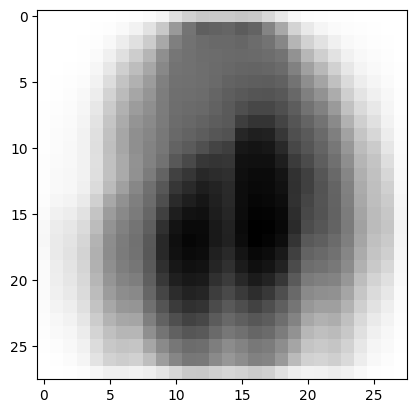

In [16]:
plt.imshow(np.mean(x_train, axis=0) / 255, cmap='Greys')
plt.show()


<u><b>Observations</b></u>

We see that although it is not very clear, we can actually make out a shoe, pants and a shirt in the image. We can also see that the corners images are not touched as well. [Image Padding not needed]


Let's see what is the average image for each class label to see how each image is similar


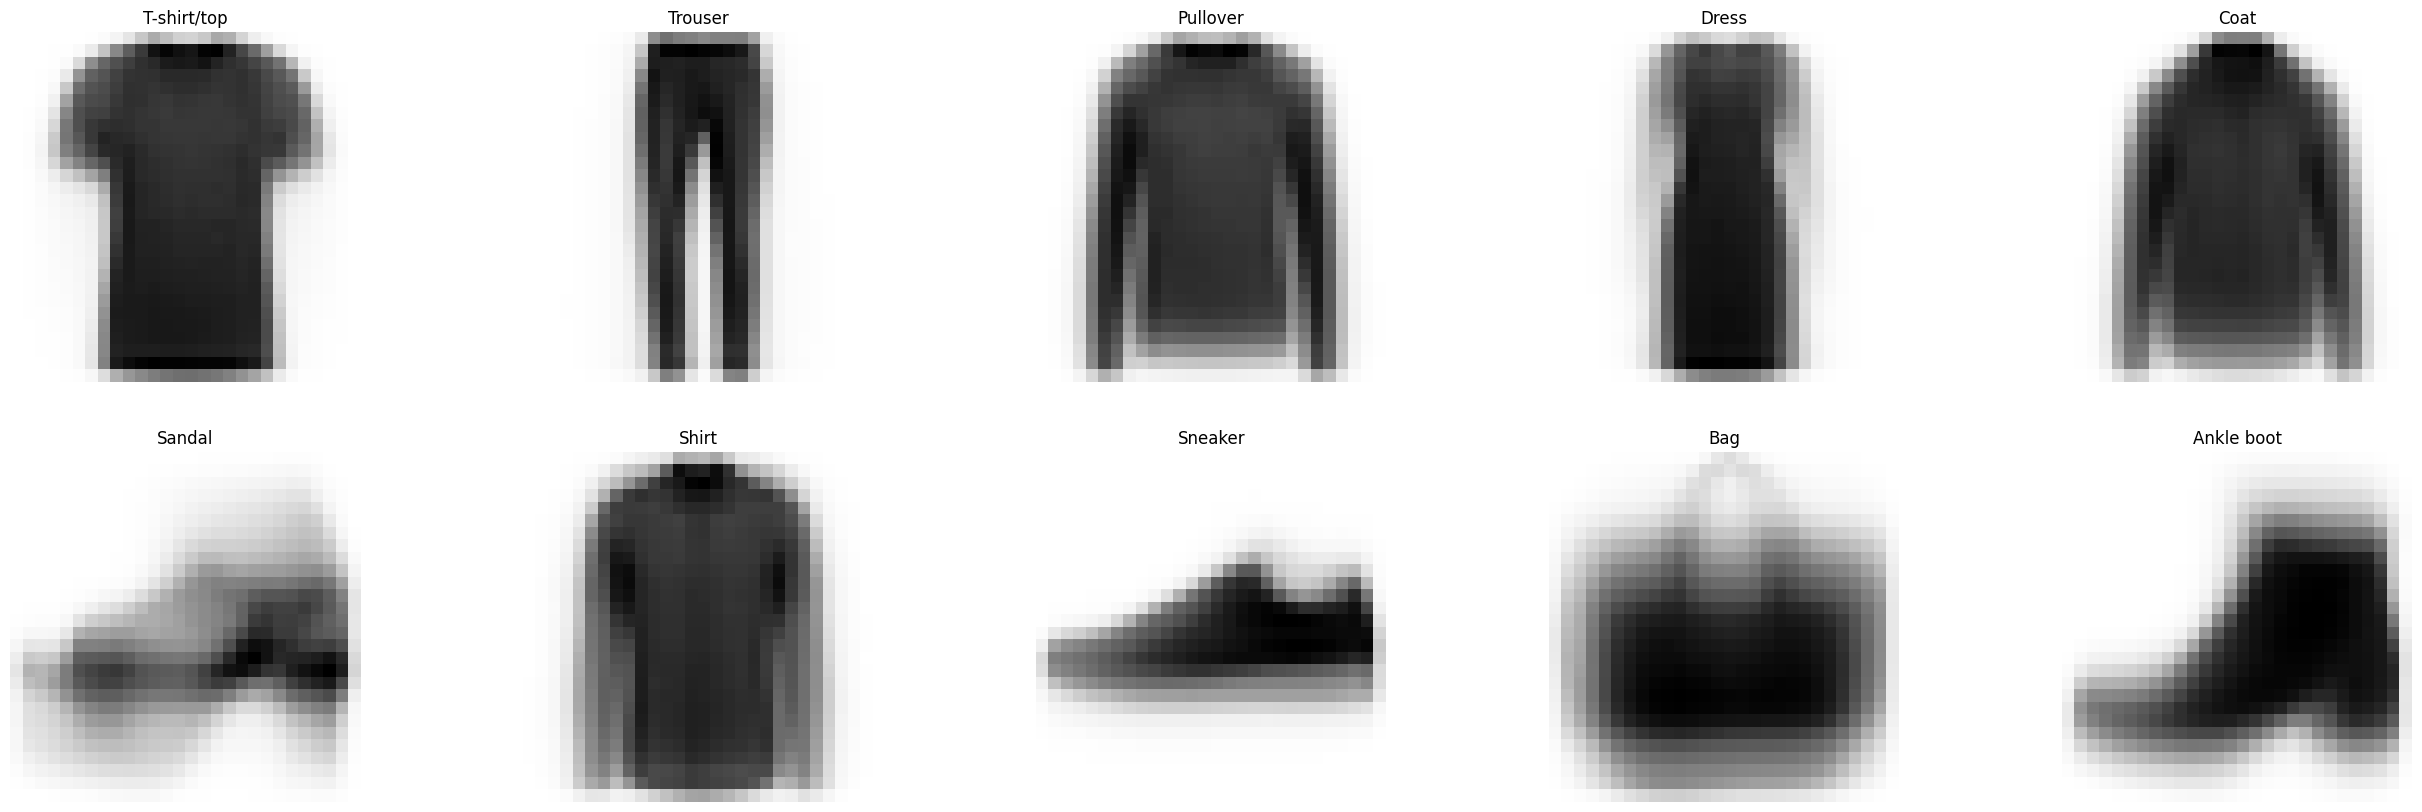

In [17]:
fig, ax = plt.subplots(2, 5, figsize=(32, 10))

for idx, subplot in enumerate(ax.ravel()):
    avg_image = np.mean(x_train[np.squeeze(y_train == idx)], axis=0) / 255
    subplot.imshow(avg_image, cmap='Greys')
    subplot.set_title(f"{class_labels[idx]}")
    subplot.axis("off")


<u><b>Observations</b></u>

As we can see, the average image of each class label is very clear for us to see and predict what the image is about.

However, you can see that Pullovers, Coats and Shirts all look quite similar to one another as they have long sleeves which makes means that model accuracy might not be very good at deciphering the different images. In the Sandal's average image, we can see that the middle of the image looks similar to the sneakers while the remaining pixels that are not as strong looks similar to the ankle boots and the model might have a hard time trying to find features to map to the different images.


# Data Preprocessing

Before modelling, its is important to perform data preprocessing


### One Hot Encoding

As they are, the current labels are encoded from 0-9, we will one hot encode the labels.


In [18]:
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)


In [19]:
print(y_train[0])
print("Label:", tf.argmax(y_train[0]))


[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
Label: tf.Tensor(9, shape=(), dtype=int64)


### Normalizing the inputs

Image normalisation is done to the dataset.

Normalising the inputs means that we will calculate the mean and standard deviation of the training set, and then apply the formula below.

$$X_{} = \frac{X_{} - μ_{}}{σ_{}}$$

Pixel values of each pixel are on similar scale, therefore normalisation can be used. This helps to optimize the algorithm to better converge during gradient descent.


In [20]:
pre_processing_v1 = Normalization()
pre_processing_v1.adapt(x_train)


In [21]:
pre_processing_v1.mean


<tf.Tensor: shape=(1, 1, 28), dtype=float32, numpy=
array([[[  2.8499734,   8.859591 ,  12.368395 ,  20.10678  ,
          36.203266 ,  53.429104 ,  64.09722  ,  71.28215  ,
          84.05552  , 100.16229  , 113.58216  , 119.21431  ,
         121.25406  , 117.447205 , 115.07686  , 123.79108  ,
         127.0856   , 124.27342  , 116.62026  , 101.4611   ,
          87.20446  ,  80.27911  ,  73.2667   ,  59.864285 ,
          43.230743 ,  32.446007 ,  23.313972 ,   5.6430893]]],
      dtype=float32)>

In [22]:
pre_processing_v1.variance


<tf.Tensor: shape=(1, 1, 28), dtype=float32, numpy=
array([[[ 288.0153 , 1392.1926 , 1887.0803 , 2914.9216 , 4850.9116 ,
         6858.577  , 7760.283  , 7918.106  , 8247.954  , 8332.75   ,
         8158.617  , 7963.1963 , 8016.325  , 8044.842  , 8130.704  ,
         7922.196  , 7676.797  , 7676.688  , 8003.404  , 8299.23   ,
         8450.069  , 8588.875  , 8359.848  , 7256.945  , 5751.3223 ,
         4798.869  , 3700.376  ,  549.91345]]], dtype=float32)>

<u><b>Observations</b></u>

We see that the values that are closer to the center of the image has higher mean and variance. This has been seen in the average image as most of the images have a brighter pixel in the center of image.


Let's see what happened to the image after we have pre processed.


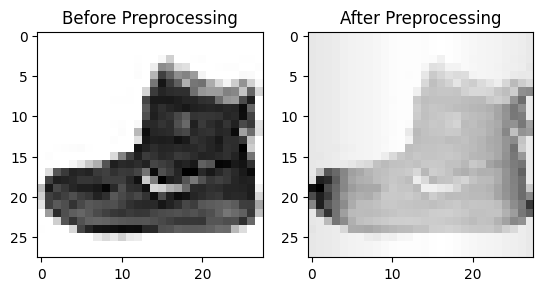

In [23]:
fig, ax = plt.subplots(ncols=2)

ax[0].imshow(x_train[0], cmap='Greys')
ax[0].set_title('Before Preprocessing')
ax[1].imshow(tf.squeeze(pre_processing_v1(x_train[:1, :, :])), cmap='Greys')
ax[1].set_title('After Preprocessing')
plt.show()


### Data Augmentation

To prevent overfitting of the model, we will apply data augmentation. Data augmentation is a method to reduce the variance of a model by imposing random transformations on the data for training.

Types of Image Data Augmentations

- Flipping
- Cropping
- Rotating
- Scaling
- Shearing
- Many more ...

For this case, we will be using only flipping and shifting. This is because as we seen during our exploratory data analysis. The images are all in the same orientation which means we can flip left and right to help make data augmentation better [Shirts can be flipped as both are symmetrical]. We will also be shifting the images up and down, as shown in the EDA, some of the images are long or shorter. By shifting the dataset, we are helping the model identify that the most important part of the image is that the shirt layer is straight etc.

Note: we will only be augmenting the training data as we do not want to edit the validation and test data as they will be used to evaluate the model's accuracy.


##### Batch Size

To help make the model to have a regularizing effect, we will choose the smaller batch sizes. We will choose a batch size of 64 as it allows the model to converge more easily.


In [24]:
BATCH_SIZE = 64


In [32]:
def data_augmentation(x_train):
    imageArr = []
    for images in x_train:
        images = images.reshape(28, 28, 1)
        image = tf.image.random_flip_left_right(images)
        image = tf.image.resize_with_crop_or_pad(
            image, IMG_SIZE[0] + 4, IMG_SIZE[1])
        image = tf.image.random_crop(
            image, size=IMG_SIZE
        )
        imageArr.append(tf.reshape(image, (28, 28)))
    return np.array(imageArr)


In [30]:
x_train_aug = np.copy(x_train)


In [33]:
x_train_aug = data_augmentation(x_train_aug)


Let's see what happened to the data after we have augmented it.


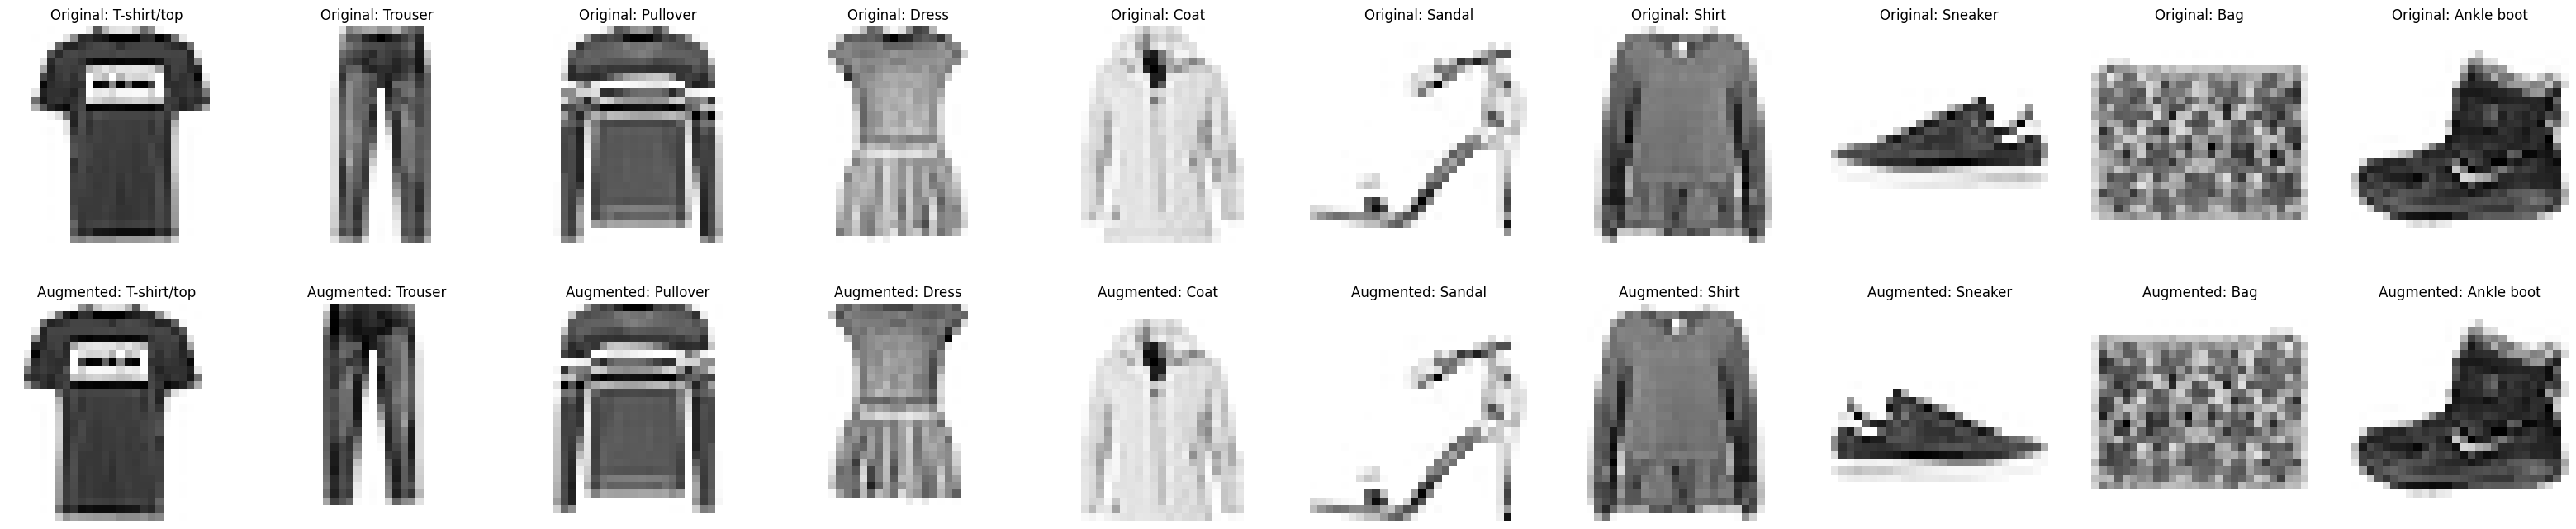

In [28]:
fig, ax = plt.subplots(2, 10, figsize=(40, 8))
for idx in range(20):
    subplot = ax.ravel()[idx]
    y_label = np.argmax(y_train, axis=1)
    if idx >= 10:
        subplot.set_title(f"Augmented: {class_labels[idx % 10]}")
        subplot.imshow(x_train_aug[y_label == idx % 10][0], cmap='Greys')
    else:
        subplot.set_title(f"Original: {class_labels[idx % 10]}")
        subplot.imshow(x_train[y_label == idx % 10][0], cmap='Greys')
    subplot.axis("off")
plt.show()


<u><b>Observations</b></u>

As we can see, some of the images have been shifted, rotated and cropped. This shows that the image augmentation works


# Building Models

We will be building a few deep learning models to solve the image classification problem.

**Model List:**

1. Fully Connected Neural Network Model (Baseline)
2. Conv2D Neural Network Model
3. CustomVGG Model
4. CustomResNet Model

<img src="https://deci.ai/wp-content/uploads/2022/03/dnns-1-1024x569.jpg.webp"/>


### Overfitting

To prevent overfitting, we will be using Early Stopping. This will stop model training once it begins to overfit.


### Optimizers

There are a lot of different types of optimizers offered by Tensorflow. The most common 2 are Adam and SGD optimizers.

**Adam**<br>
Adam optimization is a stochastic gradient descent method that is based on adaptive estimation of first-order and second-order moments.

**SGD**<br>
SGD also known as Stochastic gradient descent is an iterative method for optimizing an objective function with suitable smoothness.

**Difference between Adam and SGD**<br>
Adam is faster compared to SGD, this is due to Adam using coordinate wise gradient clipping which tackle heavy-tailed noise. It also updates the learning rate for each network weight individually. However, SGD is known to perform better than SGD for image classification tasks. As Adam takes "shortcuts" as mentioned previously which is better for NLP and other purposes but for Image Classification, every detail is important to distinguish what the image is. Therefore for all the subsequent models, we will be using the SGD as our optimizer.


### Utility Function

Before we begin building our models, we will first be building some functions that will help us to compare our models more easily.


In [1]:
def plot_loss_curve(history):
    history = pd.DataFrame(history)
    epochs = list(range(1, len(history) + 1))
    fig, ax = plt.subplots(1, 1, figsize=(20, 10))
    plt.title("Plot Loss Curve")
    plt.scatter(epochs, history["loss"])
    plt.plot(epochs, history["loss"], label="Training Loss")
    plt.scatter(epochs, history["val_loss"])
    plt.plot(epochs, history["val_loss"], label="Validation Loss")
    plt.scatter(epochs, history["accuracy"])
    plt.plot(epochs, history["accuracy"], label="Training Accuracy")
    plt.scatter(epochs, history["val_accuracy"])
    plt.plot(epochs, history["val_accuracy"], label="Validation Accuracy")
    plt.ylabel("Accuracy")
    plt.xlabel("Epochs")
    plt.legend()
    return fig


In [34]:
allResults = pd.DataFrame()


### Baseline Fully Connected Neural Network

As our baseline model, we will be using it to compare against our other models that we are trying to build. This model will be very simple Model using the Sequential class and 3 Hidden Layers. For each hidden layer, we will be using the ReLU activation function and for the final output layer we will be using softmax as there is multiple classes therefore sigmoid will not be usable. As there are multiple category that we are predicting, we will be using the categorical_crossentropy as our loss function. The optimizer will be SGD as mentioned previously and we will be using the metrics of accuracy as the classes are quite balanced.


##### Training baseline model without Data Augmentation

To train the baseline model, we will first use our unaugmented data to fit and train the model. Subsequently, we will use our augmented data to fit and train and compare the difference.


In [ ]:
tf.keras.backend.clear_session()
inputs = Input(IMG_SIZE)  # Input
x = pre_processing_v1(inputs)
x = Flatten()(x)
x = Dense(128, 'relu')(x)  # Hidden Layer 1
x = Dense(128, 'relu')(x)  # Hidden Layer 3
x = Dense(128, 'relu')(x)  # Hidden Layer 3
x = Dense(NUM_CLASS, 'softmax')(x)
baseModel = Model(inputs=inputs, outputs=x, name="baseline")
baseModel.compile(optimizer=SGD(learning_rate=0.01, momentum=0.9),
                  loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
baseModel.summary()


Model: "baseline"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 normalization (Normalizatio  (None, 28, 28, 28)       57        
 n)                                                              
                                                                 
 flatten (Flatten)           (None, 21952)             0         
                                                                 
 dense (Dense)               (None, 128)               2809984   
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                          

In [ ]:
baseModelHistory = baseModel.fit(x_train, y_train, epochs=100,
                                 validation_data=(x_val, y_val), batch_size=BATCH_SIZE, callbacks=EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True))


Epoch 1/100
750/750 [==============================] - 6s 6ms/step - loss: 0.8432 - accuracy: 0.7232 - val_loss: 0.5537 - val_accuracy: 0.7977
Epoch 2/100
750/750 [==============================] - 4s 6ms/step - loss: 0.4954 - accuracy: 0.8201 - val_loss: 0.5024 - val_accuracy: 0.8248
Epoch 3/100
750/750 [==============================] - 4s 6ms/step - loss: 0.4543 - accuracy: 0.8339 - val_loss: 0.5088 - val_accuracy: 0.8278
Epoch 4/100
750/750 [==============================] - 4s 5ms/step - loss: 0.4336 - accuracy: 0.8443 - val_loss: 0.4356 - val_accuracy: 0.8444
Epoch 5/100
750/750 [==============================] - 4s 5ms/step - loss: 0.4134 - accuracy: 0.8496 - val_loss: 0.4432 - val_accuracy: 0.8432
Epoch 6/100
750/750 [==============================] - 4s 5ms/step - loss: 0.3991 - accuracy: 0.8565 - val_loss: 0.4388 - val_accuracy: 0.8426
Epoch 7/100
750/750 [==============================] - 4s 5ms/step - loss: 0.3931 - accuracy: 0.8571 - val_loss: 0.4038 - val_accuracy: 0.8523

In [ ]:
baseModelHistory = baseModelHistory.history
best_val_idx = np.argmax(baseModelHistory["val_accuracy"])
result = {}
result["Model Name"] = "baseline"
result["Epochs"] = len(baseModelHistory["loss"])
result["Batch Size"] = BATCH_SIZE
result["Train Loss"] = baseModelHistory["loss"][best_val_idx]
result["Val Loss"] = baseModelHistory["val_loss"][best_val_idx]
result["Train Acc"] = baseModelHistory["accuracy"][best_val_idx]
result["Val Acc"] = baseModelHistory["val_accuracy"][best_val_idx]
result["[Train - Val] Acc"] = result["Train Acc"] - result["Val Acc"]
allResults = allResults.append(result, ignore_index=True)
result


C:\Users\Soh Hong Yu\AppData\Local\Temp\ipykernel_2760\3298365700.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allResults = allResults.append(result, ignore_index=True)


{'Model Name': 'baseline',
 'Epochs': 35,
 'Batch Size': 64,
 'Train Loss': 0.3145187497138977,
 'Val Loss': 0.39770007133483887,
 'Train Acc': 0.8843333125114441,
 'Val Acc': 0.8703333139419556,
 '[Train - Val] Acc': 0.013999998569488525}

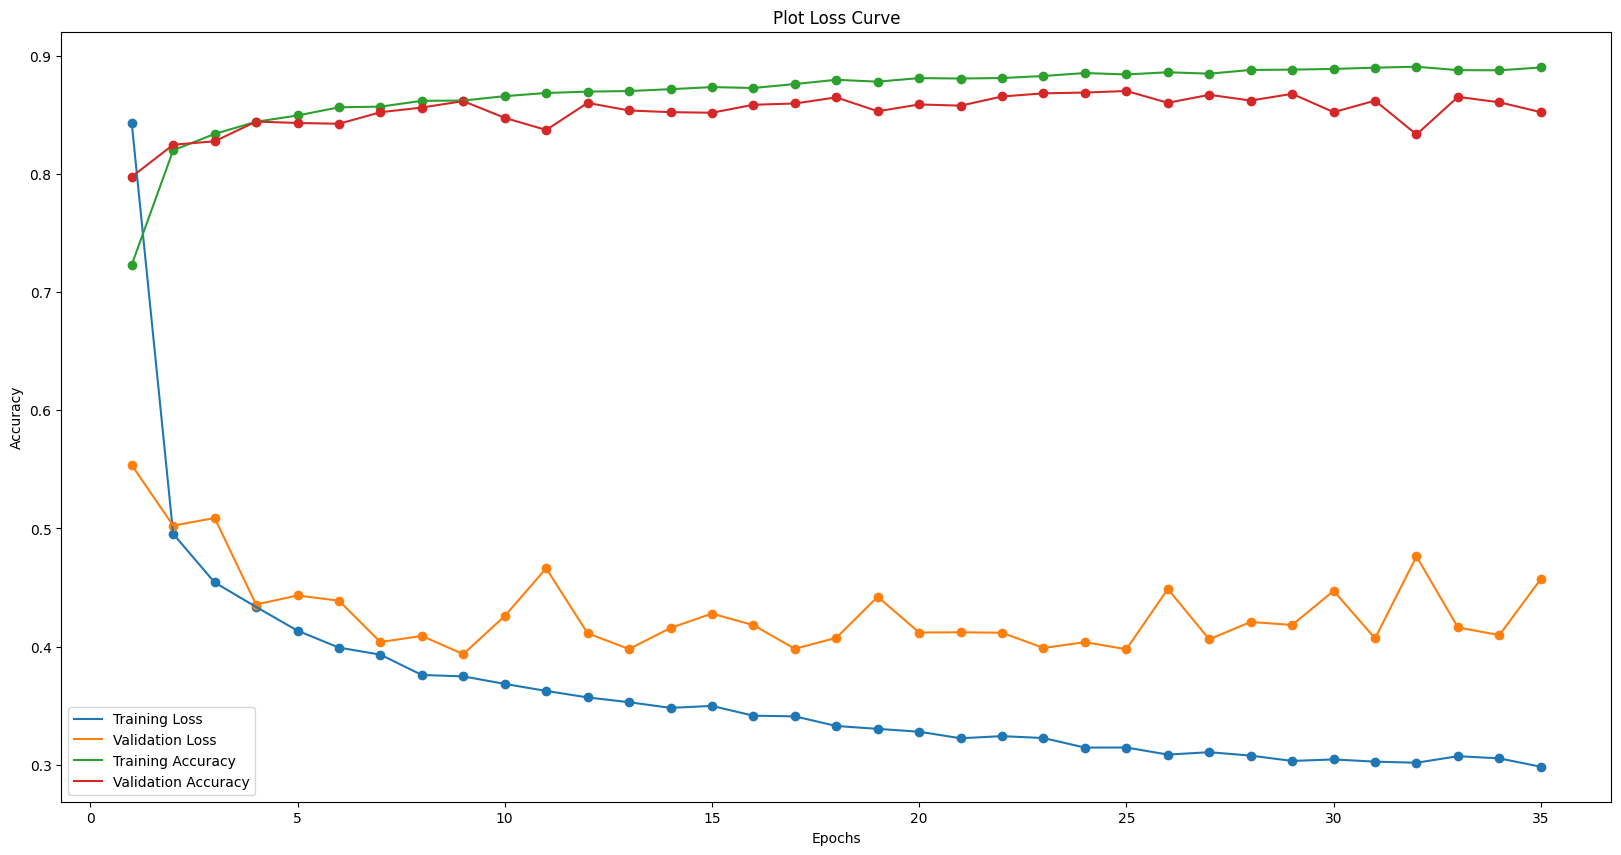

In [ ]:
plot_loss_curve(baseModelHistory)
plt.show()


<u><b>Observations</b></u>

From the loss curve, We can see that as the model increase in epochs, the model becomes more generalise and the loss functions starts decreasing too. This suggest that the baseline model is performing quite well.


##### Training baseline model with Data Augmentation

As mentioned previously, we will train the baseline model with the dataset that was augmented.


In [35]:
tf.keras.backend.clear_session()
inputs = Input(IMG_SIZE)  # Input
x = pre_processing_v1(inputs)
x = Flatten()(x)
x = Dense(128, 'relu')(x)  # Hidden Layer 1
x = Dense(128, 'relu')(x)  # Hidden Layer 3
x = Dense(128, 'relu')(x)  # Hidden Layer 3
x = Dense(NUM_CLASS, 'softmax')(x)
baseAugModel = Model(inputs=inputs, outputs=x, name="baseline_Aug")
baseAugModel.compile(optimizer=SGD(learning_rate=0.01, momentum=0.9),
                     loss='categorical_crossentropy', metrics=['accuracy'])


In [36]:
baseAugModel.summary()


Model: "baseline_Aug"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 normalization (Normalizatio  (None, 28, 28, 28)       57        
 n)                                                              
                                                                 
 flatten (Flatten)           (None, 21952)             0         
                                                                 
 dense (Dense)               (None, 128)               2809984   
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                      

In [37]:
baseAugModelHistory = baseAugModel.fit(x_train_aug, y_train, epochs=100,
                                       validation_data=(x_val, y_val), batch_size=BATCH_SIZE, callbacks=EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True))


Epoch 1/100
750/750 [==============================] - 81s 96ms/step - loss: 1.3620 - accuracy: 0.5501 - val_loss: 0.8151 - val_accuracy: 0.6883
Epoch 2/100
750/750 [==============================] - 39s 52ms/step - loss: 0.7542 - accuracy: 0.6940 - val_loss: 0.6734 - val_accuracy: 0.7122
Epoch 3/100
750/750 [==============================] - 80s 107ms/step - loss: 0.6836 - accuracy: 0.7224 - val_loss: 0.6201 - val_accuracy: 0.7414
Epoch 4/100
750/750 [==============================] - 26s 34ms/step - loss: 0.6634 - accuracy: 0.7356 - val_loss: 0.6211 - val_accuracy: 0.7559
Epoch 5/100
750/750 [==============================] - 29s 38ms/step - loss: 0.6353 - accuracy: 0.7542 - val_loss: 0.6010 - val_accuracy: 0.7786
Epoch 6/100
750/750 [==============================] - 33s 43ms/step - loss: 0.6139 - accuracy: 0.7671 - val_loss: 0.6208 - val_accuracy: 0.7708
Epoch 7/100
750/750 [==============================] - 34s 45ms/step - loss: 0.5974 - accuracy: 0.7739 - val_loss: 0.5706 - val_a

In [38]:
baseAugModelHistory = baseAugModelHistory.history
best_val_idx = np.argmax(baseAugModelHistory["val_accuracy"])
result = {}
result["Model Name"] = "baselineAug"
result["Epochs"] = len(baseAugModelHistory["loss"])
result["Batch Size"] = BATCH_SIZE
result["Train Loss"] = baseAugModelHistory["loss"][best_val_idx]
result["Val Loss"] = baseAugModelHistory["val_loss"][best_val_idx]
result["Train Acc"] = baseAugModelHistory["accuracy"][best_val_idx]
result["Val Acc"] = baseAugModelHistory["val_accuracy"][best_val_idx]
result["[Train - Val] Acc"] = result["Train Acc"] - result["Val Acc"]
allResults = allResults.append(result, ignore_index=True)
result


C:\Users\Soh Hong Yu\AppData\Local\Temp\ipykernel_37932\410227960.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allResults = allResults.append(result, ignore_index=True)


{'Model Name': 'baselineAug',
 'Epochs': 85,
 'Batch Size': 64,
 'Train Loss': 0.3828447163105011,
 'Val Loss': 0.5263938307762146,
 'Train Acc': 0.862375020980835,
 'Val Acc': 0.8441666960716248,
 '[Train - Val] Acc': 0.018208324909210205}

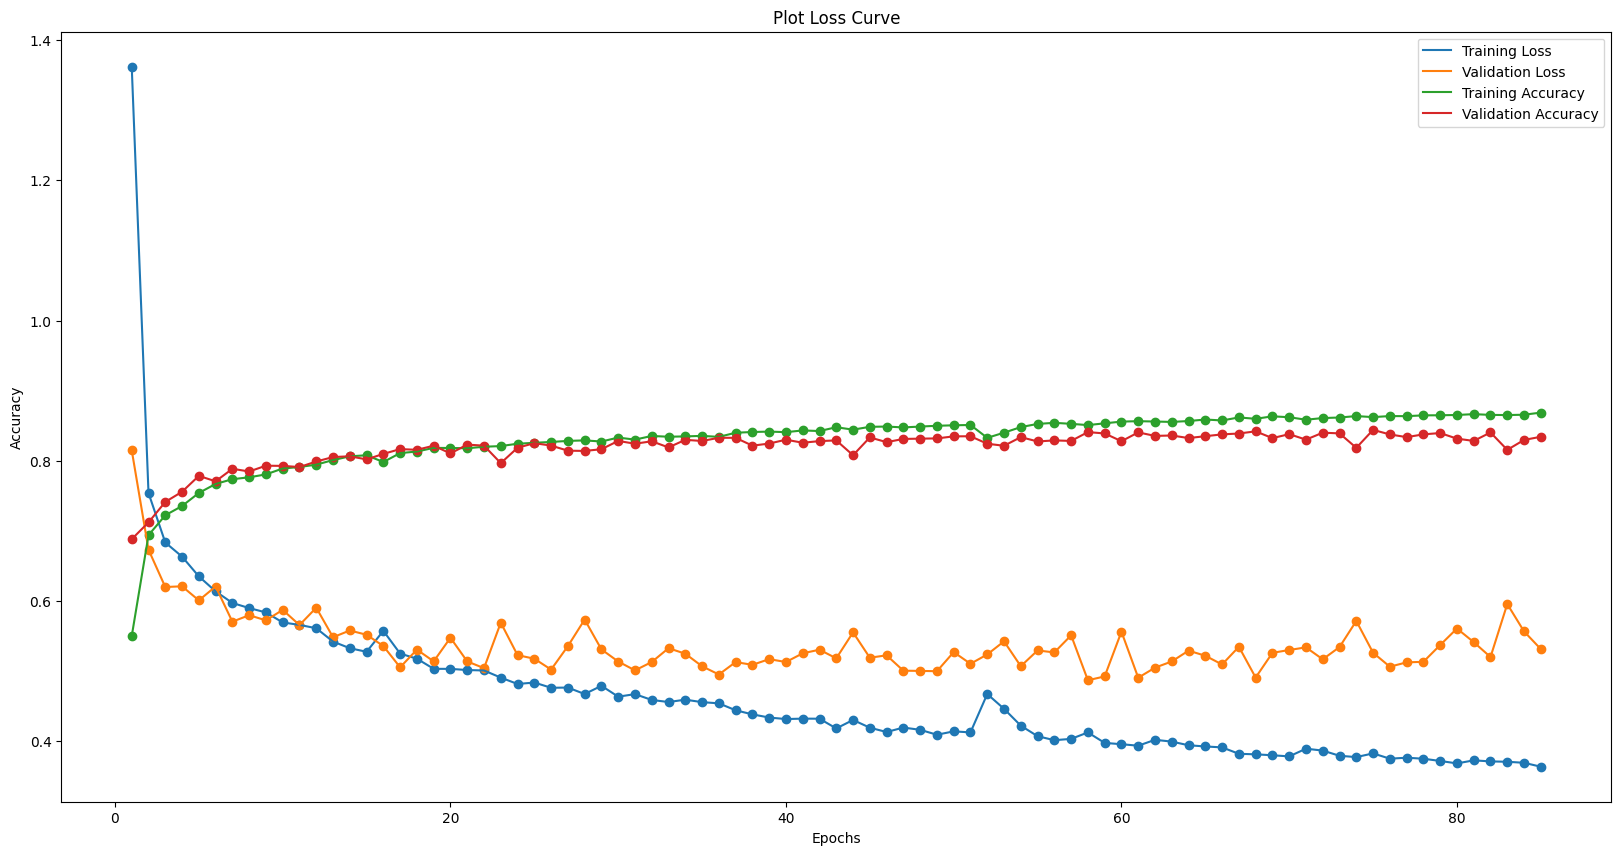

In [39]:
plot_loss_curve(baseAugModelHistory)
plt.show()


<u><b>Observations</b></u>

Comparing the data augmented dataset to the unaugmented dataset, the model performs worse and become less accurate. This is likely due to the validation data not having and augmented data and this caused the model to understand patterns that are not found in the validation data which causes both accuracy to drop. This suggest that augmenting of data for the fashion MNIST dataset is not a good method of improving accuracy.


### Conv2D Neural Network Model

After creating our baseline model, we begin making more complex models. We will be building a simple convolutional neural network (CNN). We will be using tensorflow's Conv2D layers to build the models. The reason why we use a CNN architecture is because CNNs are well suited to solve the problem of image classification. This is because the convolution layers consider the context in the local neighbourhood of the input data and constructs features from the neighbourhood. CNNs also reduce the number of parameters in the network due to its sparse connections and weight sharing properties.


##### Training conv2D model without Data Augmentation


In [ ]:
tf.keras.backend.clear_session()
inputs = Input(IMG_SIZE)  # Input
x = pre_processing_v1(inputs)
x = Conv2D(32, (5, 5), input_shape=IMG_SIZE, activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(0.2)(x)
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
x = Dense(NUM_CLASS, 'softmax')(x)
conv2DModel = Model(inputs=inputs, outputs=x, name="conv2D")
conv2DModel.compile(optimizer=SGD(learning_rate=0.01, momentum=0.9),
                    loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
conv2DModel.summary()


Model: "conv2D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 normalization (Normalizatio  (None, 28, 28, 28)       57        
 n)                                                              
                                                                 
 conv2d (Conv2D)             (None, 24, 24, 32)        22432     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 12, 12, 32)        0         
                                                                 
 flatten (Flatten)           (None, 4608)              0    

In [ ]:
conv2DModelHistory = conv2DModel.fit(x_train, y_train, epochs=100,
                                     validation_data=(x_val, y_val), batch_size=BATCH_SIZE, callbacks=EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True))


Epoch 1/100
750/750 [==============================] - 9s 6ms/step - loss: 0.5424 - accuracy: 0.8065 - val_loss: 0.4246 - val_accuracy: 0.8467
Epoch 2/100
750/750 [==============================] - 5s 6ms/step - loss: 0.3863 - accuracy: 0.8584 - val_loss: 0.3616 - val_accuracy: 0.8672
Epoch 3/100
750/750 [==============================] - 5s 6ms/step - loss: 0.3475 - accuracy: 0.8718 - val_loss: 0.3431 - val_accuracy: 0.8689
Epoch 4/100
750/750 [==============================] - 5s 6ms/step - loss: 0.3216 - accuracy: 0.8799 - val_loss: 0.3486 - val_accuracy: 0.8738
Epoch 5/100
750/750 [==============================] - 5s 7ms/step - loss: 0.3033 - accuracy: 0.8859 - val_loss: 0.3390 - val_accuracy: 0.8748
Epoch 6/100
750/750 [==============================] - 5s 6ms/step - loss: 0.2874 - accuracy: 0.8919 - val_loss: 0.3267 - val_accuracy: 0.8811
Epoch 7/100
750/750 [==============================] - 5s 6ms/step - loss: 0.2716 - accuracy: 0.8975 - val_loss: 0.3480 - val_accuracy: 0.8727

In [ ]:
conv2DModelHistory = conv2DModelHistory.history
best_val_idx = np.argmax(conv2DModelHistory["val_accuracy"])
result = {}
result["Model Name"] = "conv2D"
result["Epochs"] = len(conv2DModelHistory["loss"])
result["Batch Size"] = BATCH_SIZE
result["Train Loss"] = conv2DModelHistory["loss"][best_val_idx]
result["Val Loss"] = conv2DModelHistory["val_loss"][best_val_idx]
result["Train Acc"] = conv2DModelHistory["accuracy"][best_val_idx]
result["Val Acc"] = conv2DModelHistory["val_accuracy"][best_val_idx]
result["[Train - Val] Acc"] = result["Train Acc"] - result["Val Acc"]
result = pd.Series(result, name=result["Model Name"])
allResults = allResults.append(result, ignore_index=True)
result


C:\Users\Soh Hong Yu\AppData\Local\Temp\ipykernel_2760\3935077863.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allResults = allResults.append(result, ignore_index=True)


Model Name             conv2D
Epochs                     18
Batch Size                 64
Train Loss           0.262191
Val Loss             0.313302
Train Acc            0.899833
Val Acc              0.891583
[Train - Val] Acc     0.00825
Name: conv2D, dtype: object

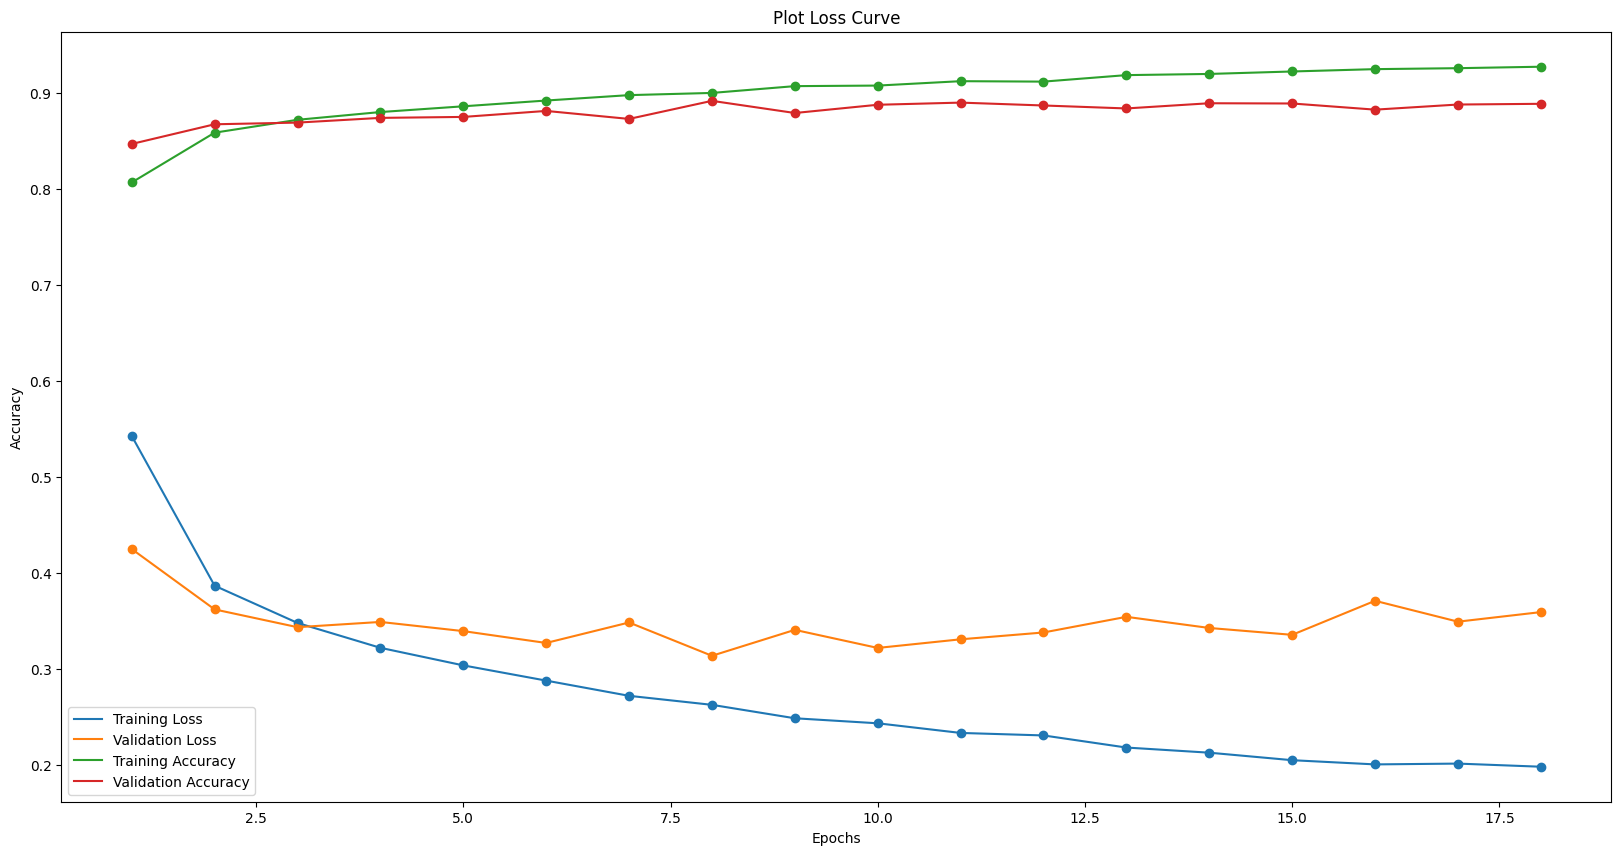

In [ ]:
plot_loss_curve(conv2DModelHistory)
plt.show()


<u><b>Observations</b></u>

Comparing out conv2D model compared to our baseline model, we can clearly see that conv2D model performed greater than baseline model as not only did the accuracy increase, the loss values also decreased. This shows and proves that the conv2D model is better than baseline neural networks as model is able to use neighbouring pixels to help in prediction and understanding the different features of the images.


##### Training conv2D model with Data Augmentation


In [40]:
tf.keras.backend.clear_session()
inputs = Input(IMG_SIZE)  # Input
x = pre_processing_v1(inputs)
x = Conv2D(32, (5, 5), input_shape=IMG_SIZE, activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(0.2)(x)
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
x = Dense(NUM_CLASS, 'softmax')(x)
conv2DAugModel = Model(inputs=inputs, outputs=x, name="conv2D")
conv2DAugModel.compile(optimizer=SGD(learning_rate=0.01, momentum=0.9),
                       loss='categorical_crossentropy', metrics=['accuracy'])


In [41]:
conv2DAugModel.summary()


Model: "conv2D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 normalization (Normalizatio  (None, 28, 28, 28)       57        
 n)                                                              
                                                                 
 conv2d (Conv2D)             (None, 24, 24, 32)        22432     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 12, 12, 32)        0         
                                                                 
 flatten (Flatten)           (None, 4608)              0    

In [46]:
conv2DAugModelHistory = conv2DAugModel.fit(x_train_aug, y_train, epochs=100,
                                           validation_data=(x_val, y_val), batch_size=BATCH_SIZE, callbacks=EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True))


Epoch 1/100
750/750 [==============================] - 83s 110ms/step - loss: 0.2255 - accuracy: 0.9156 - val_loss: 0.4413 - val_accuracy: 0.8699
Epoch 2/100
750/750 [==============================] - 69s 92ms/step - loss: 0.2286 - accuracy: 0.9158 - val_loss: 0.4770 - val_accuracy: 0.8571
Epoch 3/100
750/750 [==============================] - 57s 76ms/step - loss: 0.2150 - accuracy: 0.9193 - val_loss: 0.4800 - val_accuracy: 0.8668
Epoch 4/100
750/750 [==============================] - 50s 66ms/step - loss: 0.2084 - accuracy: 0.9211 - val_loss: 0.4560 - val_accuracy: 0.8693
Epoch 5/100
750/750 [==============================] - 47s 62ms/step - loss: 0.2131 - accuracy: 0.9222 - val_loss: 0.4672 - val_accuracy: 0.8708
Epoch 6/100
750/750 [==============================] - 57s 75ms/step - loss: 0.2047 - accuracy: 0.9255 - val_loss: 0.4828 - val_accuracy: 0.8587
Epoch 7/100
750/750 [==============================] - 65s 87ms/step - loss: 0.1954 - accuracy: 0.9275 - val_loss: 0.5021 - val_a

In [47]:
conv2DAugModelHistory = conv2DAugModelHistory.history
best_val_idx = np.argmax(conv2DAugModelHistory["val_accuracy"])
result = {}
result["Model Name"] = "conv2DAug"
result["Epochs"] = len(conv2DAugModelHistory["loss"])
result["Batch Size"] = BATCH_SIZE
result["Train Loss"] = conv2DAugModelHistory["loss"][best_val_idx]
result["Val Loss"] = conv2DAugModelHistory["val_loss"][best_val_idx]
result["Train Acc"] = conv2DAugModelHistory["accuracy"][best_val_idx]
result["Val Acc"] = conv2DAugModelHistory["val_accuracy"][best_val_idx]
result["[Train - Val] Acc"] = result["Train Acc"] - result["Val Acc"]
result = pd.Series(result, name=result["Model Name"])
allResults = allResults.append(result, ignore_index=True)
result


C:\Users\Soh Hong Yu\AppData\Local\Temp\ipykernel_37932\1807718742.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allResults = allResults.append(result, ignore_index=True)


Model Name           conv2DAug
Epochs                      15
Batch Size                  64
Train Loss             0.21314
Val Loss              0.467183
Train Acc             0.922167
Val Acc                0.87075
[Train - Val] Acc     0.051417
Name: conv2DAug, dtype: object

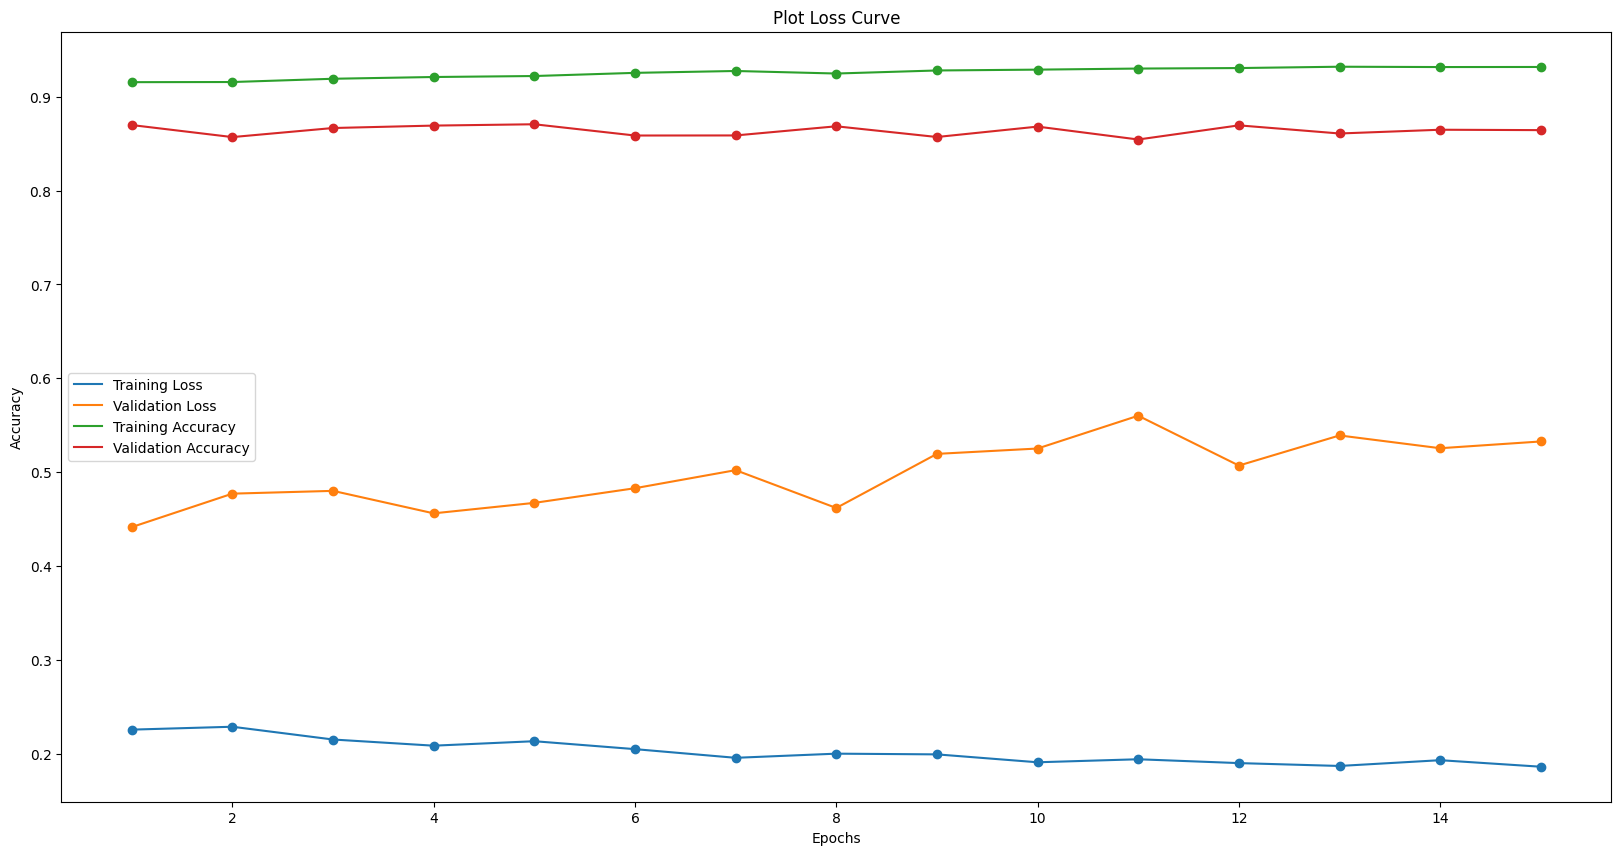

In [48]:
plot_loss_curve(conv2DAugModelHistory)
plt.show()


<u><b>Observations</b></u>

Comparing out conv2D model with aug compared to our conv2D model without aug, we can clearly see that conv2D model without aug performed better than conv2D model with aug in terms of validation accuracy. However, the training accuracy increased which suggest that with the conv2D layers, the model is able to better predict the augmented data. [overfit]



### CustomVGG Model

VGG-16 is a convolutional neural network that is 16 layers deep.

<img src="https://miro.medium.com/max/828/1*UeAhoKM0kJfCPA03wt5H0A.png">


##### VGG16 Model Deep Dive


In [ ]:
vgg16Model = tf.keras.applications.vgg16.VGG16(
    include_top=True,
    weights='imagenet',
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifier_activation='softmax'
)


In [ ]:
vgg16Model.summary()


Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

<u><b>Observations</b></u>

We see that despite only having 16 layers, the VGG16 model, but there is a large parameter size. This is because each layer has a complex input shape which will make training slow. And because of time and training constraint, we will be reducing the number of layers and making a custom vgg model.


##### Building the Custom VGG model

From the main VGG16 model, we can see that the VGG network is build based on blocks. Each block contains 2/3 layers of Conv2D and a MaxPooling2D layer. We will build it based on the [https://d2l.ai/chapter_convolutional-modern/vgg.html#]. After the main VGG block has been created, there is a flatten layer followed by 2 fully connected neural networks [relu] which helps the model reach the output layer [softmax].


In [49]:
def vgg_block(num_convs, num_channels):
    blk = Sequential()
    for _ in range(num_convs):
        blk.add(
            Conv2D(num_channels, kernel_size=3,
                   padding='same', activation='relu'))
        blk.add(
            BatchNormalization())
        blk.add(ReLU())
    blk.add(MaxPool2D(pool_size=2, strides=2))
    return blk


##### Training CustomVGG model without Data Augmentation


In [ ]:
tf.keras.backend.clear_session()
inputs = Input(IMG_SIZE)  # Input
x = pre_processing_v1(inputs)
x = vgg_block(2, 32)(x)  # we are using less filters compared to VGG16
x = vgg_block(2, 64)(x)
x = vgg_block(3, 128)(x)
x = vgg_block(3, 256)(x)
x = Flatten()(x)
x = Dense(256, 'relu')(x)
x = Dropout(0.3)(x)
x = Dense(NUM_CLASS, 'softmax')(x)
customVGGModel = Model(inputs=inputs, outputs=x, name="CustomVGG")
customVGGModel.compile(optimizer=SGD(learning_rate=0.01, momentum=0.9),
                       loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
customVGGModel.summary()


Model: "CustomVGG"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 normalization (Normalizatio  (None, 28, 28, 28)       57        
 n)                                                              
                                                                 
 sequential (Sequential)     (None, 14, 14, 32)        17600     
                                                                 
 sequential_1 (Sequential)   (None, 7, 7, 64)          55936     
                                                                 
 sequential_2 (Sequential)   (None, 3, 3, 128)         370560    
                                                                 
 sequential_3 (Sequential)   (None, 1, 1, 256)         1478400   
                                                         

In [ ]:
customVGGModelHistory = customVGGModel.fit(x_train, y_train, epochs=100,
                                           validation_data=(x_val, y_val), batch_size=BATCH_SIZE, callbacks=EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True))


Epoch 1/100
750/750 [==============================] - 19s 22ms/step - loss: 0.5630 - accuracy: 0.7966 - val_loss: 0.4889 - val_accuracy: 0.8184
Epoch 2/100
750/750 [==============================] - 16s 21ms/step - loss: 0.3372 - accuracy: 0.8769 - val_loss: 0.3386 - val_accuracy: 0.8717
Epoch 3/100
750/750 [==============================] - 15s 20ms/step - loss: 0.2807 - accuracy: 0.8957 - val_loss: 0.2654 - val_accuracy: 0.9035
Epoch 4/100
750/750 [==============================] - 15s 20ms/step - loss: 0.2449 - accuracy: 0.9101 - val_loss: 0.2457 - val_accuracy: 0.9108
Epoch 5/100
750/750 [==============================] - 15s 20ms/step - loss: 0.2178 - accuracy: 0.9202 - val_loss: 0.2397 - val_accuracy: 0.9129
Epoch 6/100
750/750 [==============================] - 15s 20ms/step - loss: 0.2017 - accuracy: 0.9257 - val_loss: 0.3356 - val_accuracy: 0.8768
Epoch 7/100
750/750 [==============================] - 15s 19ms/step - loss: 0.1824 - accuracy: 0.9320 - val_loss: 0.2525 - val_ac

In [ ]:
customVGGModelHistory = customVGGModelHistory.history
best_val_idx = np.argmax(customVGGModelHistory["val_accuracy"])
result = {}
result["Model Name"] = "customVGG"
result["Epochs"] = len(customVGGModelHistory["loss"])
result["Batch Size"] = BATCH_SIZE
result["Train Loss"] = customVGGModelHistory["loss"][best_val_idx]
result["Val Loss"] = customVGGModelHistory["val_loss"][best_val_idx]
result["Train Acc"] = customVGGModelHistory["accuracy"][best_val_idx]
result["Val Acc"] = customVGGModelHistory["val_accuracy"][best_val_idx]
result["[Train - Val] Acc"] = result["Train Acc"] - result["Val Acc"]
allResults = allResults.append(result, ignore_index=True)
result


C:\Users\Soh Hong Yu\AppData\Local\Temp\ipykernel_2760\300855129.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allResults = allResults.append(result, ignore_index=True)


{'Model Name': 'customVGG',
 'Epochs': 43,
 'Batch Size': 64,
 'Train Loss': 0.019438067451119423,
 'Val Loss': 0.3996966481208801,
 'Train Acc': 0.9935833215713501,
 'Val Acc': 0.9261666536331177,
 '[Train - Val] Acc': 0.06741666793823242}

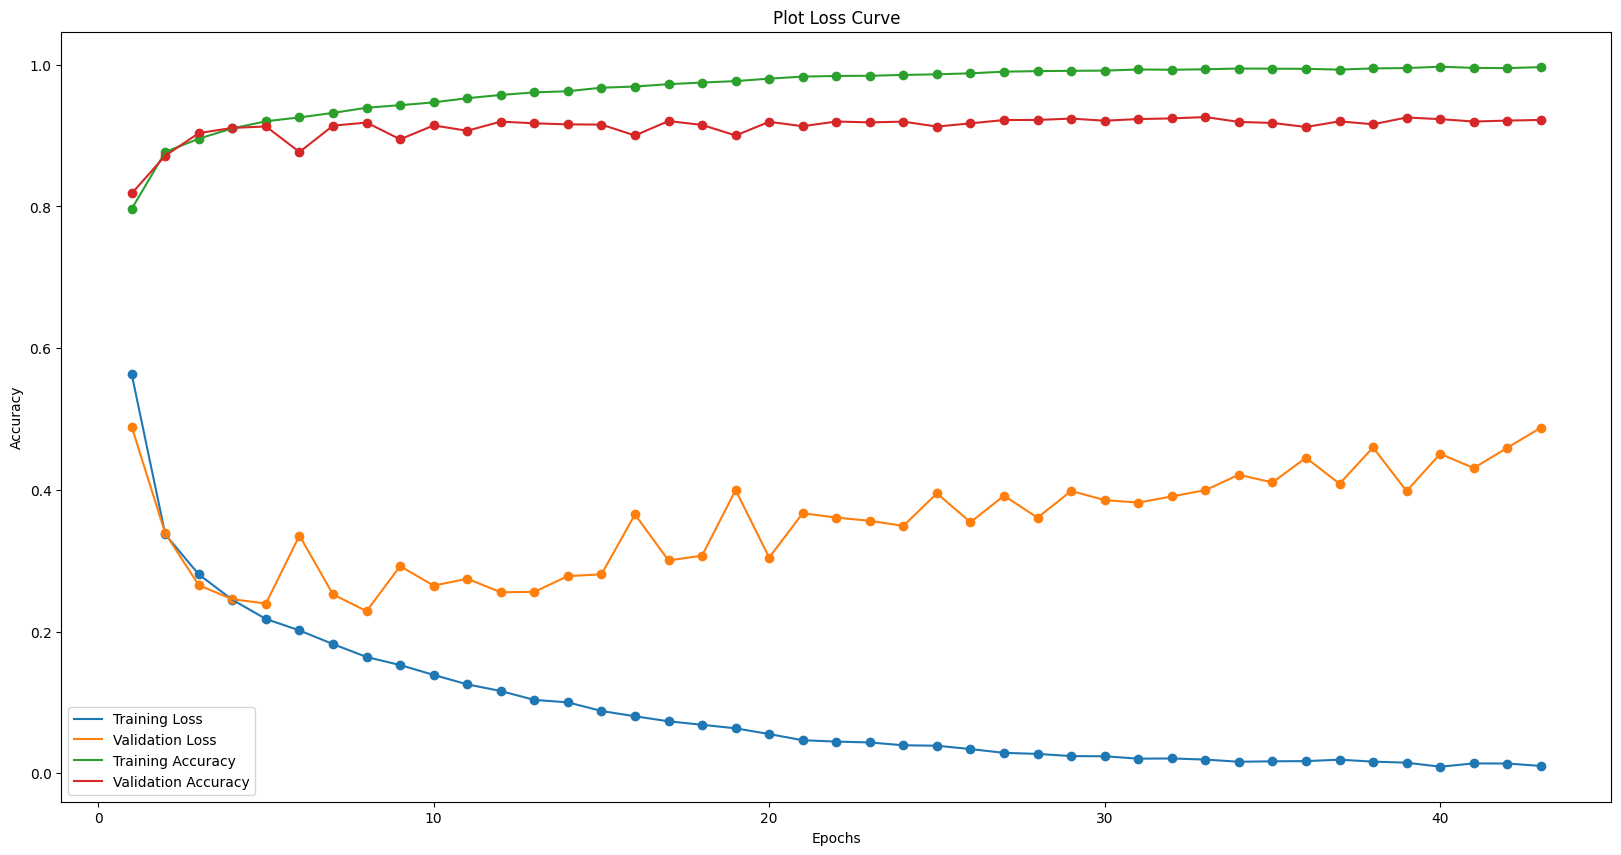

In [ ]:
plot_loss_curve(customVGGModelHistory)
plt.show()


<u><b>Observations</b></u>

Comparing our CustomVGGModel with our baseline model, we can see that the VGG model is able to predict and classify the images better with higher accuracy and is generalising the data. As the validation loss increased over time with more epochs, it seems that the VGG model is quite overfitted. To reduce the validation loss, we will try to use the augmented data.


##### Training CustomVGG model with Data Augmentation


In [50]:
tf.keras.backend.clear_session()
inputs = Input(IMG_SIZE)  # Input
x = pre_processing_v1(inputs)
x = vgg_block(2, 32)(x)  # we are using less filters compared to VGG16
x = vgg_block(2, 64)(x)
x = vgg_block(3, 128)(x)
x = vgg_block(3, 256)(x)
x = Flatten()(x)
x = Dense(256, 'relu')(x)
x = Dropout(0.3)(x)
x = Dense(NUM_CLASS, 'softmax')(x)
customVGGAugModel = Model(inputs=inputs, outputs=x, name="CustomVGGAug")
customVGGAugModel.compile(optimizer=SGD(learning_rate=0.01, momentum=0.9),
                          loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
customVGGAugModel.summary()


Model: "CustomVGGAug"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 normalization (Normalizatio  (None, 28, 28, 28)       57        
 n)                                                              
                                                                 
 sequential (Sequential)     (None, 14, 14, 32)        17600     
                                                                 
 sequential_1 (Sequential)   (None, 7, 7, 64)          55936     
                                                                 
 sequential_2 (Sequential)   (None, 3, 3, 128)         370560    
                                                                 
 sequential_3 (Sequential)   (None, 1, 1, 256)         1478400   
                                                      

In [51]:
customVGGAugModelHistory = customVGGAugModel.fit(x_train_aug, y_train, epochs=100,
                                                 validation_data=(x_val, y_val), batch_size=BATCH_SIZE, callbacks=EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True))


Epoch 1/100
750/750 [==============================] - 320s 402ms/step - loss: 0.6558 - accuracy: 0.7600 - val_loss: 0.3762 - val_accuracy: 0.8590
Epoch 2/100
750/750 [==============================] - 174s 233ms/step - loss: 0.3891 - accuracy: 0.8577 - val_loss: 0.3345 - val_accuracy: 0.8773
Epoch 3/100
750/750 [==============================] - 183s 244ms/step - loss: 0.3210 - accuracy: 0.8816 - val_loss: 0.3160 - val_accuracy: 0.8870
Epoch 4/100
750/750 [==============================] - 199s 260ms/step - loss: 0.2821 - accuracy: 0.8976 - val_loss: 0.2783 - val_accuracy: 0.8964
Epoch 5/100
750/750 [==============================] - 192s 257ms/step - loss: 0.2524 - accuracy: 0.9084 - val_loss: 0.3077 - val_accuracy: 0.8876
Epoch 6/100
750/750 [==============================] - 210s 280ms/step - loss: 0.2254 - accuracy: 0.9182 - val_loss: 0.3201 - val_accuracy: 0.8947
Epoch 7/100
750/750 [==============================] - 152s 203ms/step - loss: 0.2042 - accuracy: 0.9244 - val_loss: 0

In [52]:
customVGGAugModelHistory = customVGGAugModelHistory.history
best_val_idx = np.argmax(customVGGAugModelHistory["val_accuracy"])
result = {}
result["Model Name"] = "customVGGAug"
result["Epochs"] = len(customVGGAugModelHistory["loss"])
result["Batch Size"] = BATCH_SIZE
result["Train Loss"] = customVGGAugModelHistory["loss"][best_val_idx]
result["Val Loss"] = customVGGAugModelHistory["val_loss"][best_val_idx]
result["Train Acc"] = customVGGAugModelHistory["accuracy"][best_val_idx]
result["Val Acc"] = customVGGAugModelHistory["val_accuracy"][best_val_idx]
result["[Train - Val] Acc"] = result["Train Acc"] - result["Val Acc"]
allResults = allResults.append(result, ignore_index=True)
result


C:\Users\Soh Hong Yu\AppData\Local\Temp\ipykernel_37932\1215830663.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allResults = allResults.append(result, ignore_index=True)


{'Model Name': 'customVGGAug',
 'Epochs': 47,
 'Batch Size': 64,
 'Train Loss': 0.016653146594762802,
 'Val Loss': 0.4349783957004547,
 'Train Acc': 0.9945416450500488,
 'Val Acc': 0.9194999933242798,
 '[Train - Val] Acc': 0.07504165172576904}

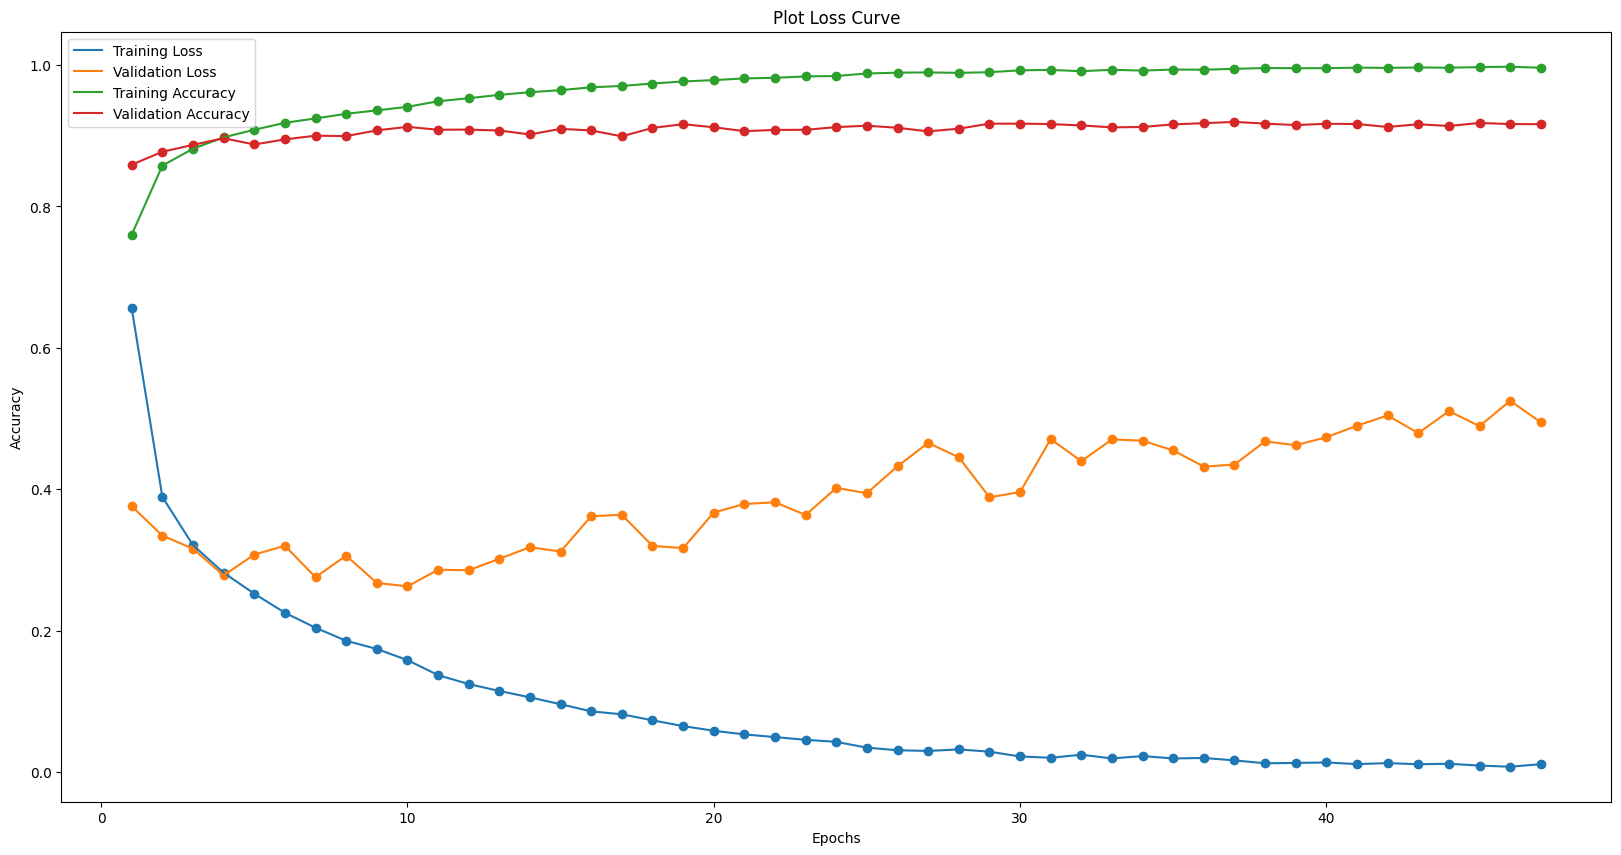

In [53]:
plot_loss_curve(customVGGAugModelHistory)
plt.show()


<u><b>Observations</b></u>

Comparing our CustomVGGModel with aug to our CustomVGGModel without aug, we note that the train accuracy is higher but the test accuracy is lower but it is not as significant compared to the other models. However, the validation loss is still higher than the none augmented data. This suggest that more needs to be done like regularisation or other forms of data augmentation.


In [ ]:
allResults = allResults.append({
    "Model Name": "CustomVGG",
    "Epochs": 50,
    "Batch Size": 64,
    "Train Loss": 0.033576,
    "Val Loss": 3.923757,
    "Train Acc": 0.989400,
    "Val Acc": 0.505400,
    "[Train - Val] Acc": 0.484000,
},ignore_index=True)

C:\Users\Soh Hong Yu\AppData\Local\Temp\ipykernel_10728\93878457.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allResults = allResults.append({


### CustomResNet Model


##### ResNet50 Model Deep Dive

ResNets are called Residual Networks. ResNet is a special type of convolutional neural network (CNN). It was first introduced in 2015 by Kaiming He, Xiangyu Zhang, Shaoqing Ren, and Jian Sun in their paper – "Deep Residual Learning for Image Recognition".

A ResNet model can be called an upgraded version of the VGG architecture with some differences. The ResNet model will skip connections. The following image shows the difference between the ResNet and VGG model as well as a basic conv2D neural network.
<br>
<img src="https://cdn-images-1.medium.com/max/1600/1*rOFPhrpfwguotGdB1-BseA.png" style="width: 25%">


As we can see from the diagram, we can see that the ResNet model has skip connections and it jumps the gun between it's layers. So what is the purpose? There are issues with classic neural networks called the vanishing gradient problem. With more layers being added to a neural network, the performance starts dropping due to the aforementioned vanishing gradient problem. To solve this issue, skipping connections [skipping layers] allows us to avoid the vanishing gradient problem.<br>
<img src="https://cdn-images-1.medium.com/max/1600/1*SGrc3VC3fbirosDPW0AmMA.png" style="width: 50%;">


As we can see from the image above, there are 2 types of skip connections, an Identity block [left side] and a Bottleneck / Convolutional block [right side]. The difference is that the Identity block directly adds the residue to the output whereas, the Convolutional block performs a convolution followed by Batch Normalisation on the residue before adding it to the output.


In [ ]:
resNet50Model = tf.keras.applications.resnet50.ResNet50(
    include_top=True,
    weights='imagenet',
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000,
)


In [ ]:
resNet50Model.summary()


Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

As there are many iterations of the ResNet model, and we found out the main features of ResNet network. We will be coding a small custom ResNet-10 [Number represents number of layers not inclusive of the convolutional blocks [Skip Connection Conv2D]] model based on [https://d2l.ai/chapter_convolutional-modern/resnet.html]


In [54]:
def identity_block(x, filter):
    x_skip = x
    x = Conv2D(filter, (3, 3), padding='same')(x)
    x = BatchNormalization(axis=3)(x)
    x = Activation('relu')(x)
    x = Conv2D(filter, (3, 3), padding='same')(x)
    x = BatchNormalization(axis=3)(x)
    x = Add()([x, x_skip])
    x = Activation('relu')(x)
    return x


In [55]:
def convolutional_block(x, filter):
    x_skip = x
    x = Conv2D(filter, (3, 3), padding='same', strides=(2, 2))(x)
    x = BatchNormalization(axis=3)(x)
    x = Activation('relu')(x)
    x = Conv2D(filter, (3, 3), padding='same')(x)
    x = BatchNormalization(axis=3)(x)
    x_skip = Conv2D(filter, (1, 1), strides=(2, 2))(x_skip)
    x = Add()([x, x_skip])
    x = Activation('relu')(x)
    return x


##### Training CustomResNet model without Data Augmentation


In [ ]:
tf.keras.backend.clear_session()
inputs = Input(IMG_SIZE)  # Input
x = pre_processing_v1(inputs)
x = ZeroPadding2D((3, 3))(x)
x = Conv2D(64, kernel_size=7, strides=2, padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPool2D(pool_size=3, strides=2, padding='same')(x)
block_layers = [1, 1, 1, 1]
filter_size = 64
for i in range(4):
    if i == 0:
        # For sub-block 1 Residual/Convolutional block not needed
        for j in range(block_layers[i]):
            x = identity_block(x, filter_size)
    else:
        # One Residual/Convolutional Block followed by Identity blocks
        # The filter size will go on increasing by a factor of 2
        filter_size = filter_size*2
        x = convolutional_block(x, filter_size)
        for j in range(block_layers[i] - 1):
            x = identity_block(x, filter_size)
x = AveragePooling2D((2, 2), padding='same')(x)
x = Flatten()(x)
x = Dense(NUM_CLASS, 'softmax')(x)
customResNetModel = Model(inputs=inputs, outputs=x, name="CustomResNet")
customResNetModel.compile(optimizer=SGD(learning_rate=0.01, momentum=0.9),
                          loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
customResNetModel.summary()


Model: "CustomResNet"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 normalization (Normalization)  (None, 28, 28, 28)   57          ['input_1[0][0]']                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 34, 34, 28)  0           ['normalization[7][0]']          
                                                                                                  
 conv2d (Conv2D)                (None, 17, 17, 64)   87872       ['zero_padding2d[0][0]']         
                                                                                       

In [ ]:
customResNetModelHistory = customResNetModel.fit(x_train, y_train, epochs=100,
                                                 validation_data=(x_val, y_val), batch_size=BATCH_SIZE, callbacks=EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True))


Epoch 1/100
750/750 [==============================] - 29s 39ms/step - loss: 0.1476 - accuracy: 0.9440 - val_loss: 0.2648 - val_accuracy: 0.9107
Epoch 2/100
750/750 [==============================] - 21s 28ms/step - loss: 0.1299 - accuracy: 0.9501 - val_loss: 0.2741 - val_accuracy: 0.9056
Epoch 3/100
750/750 [==============================] - 20s 27ms/step - loss: 0.1137 - accuracy: 0.9571 - val_loss: 0.2749 - val_accuracy: 0.9098
Epoch 4/100
750/750 [==============================] - 21s 28ms/step - loss: 0.1012 - accuracy: 0.9606 - val_loss: 0.3078 - val_accuracy: 0.9125
Epoch 5/100
750/750 [==============================] - 33s 44ms/step - loss: 0.0880 - accuracy: 0.9674 - val_loss: 0.3122 - val_accuracy: 0.9033
Epoch 6/100
750/750 [==============================] - 22s 30ms/step - loss: 0.0812 - accuracy: 0.9688 - val_loss: 0.3139 - val_accuracy: 0.9055
Epoch 7/100
750/750 [==============================] - 20s 26ms/step - loss: 0.0647 - accuracy: 0.9756 - val_loss: 0.3206 - val_ac

In [ ]:
customResNetModelHistory = customResNetModelHistory.history
best_val_idx = np.argmax(customResNetModelHistory["val_accuracy"])
result = {}
result["Model Name"] = "customResNet"
result["Epochs"] = len(customResNetModelHistory["loss"])
result["Batch Size"] = BATCH_SIZE
result["Train Loss"] = customResNetModelHistory["loss"][best_val_idx]
result["Val Loss"] = customResNetModelHistory["val_loss"][best_val_idx]
result["Train Acc"] = customResNetModelHistory["accuracy"][best_val_idx]
result["Val Acc"] = customResNetModelHistory["val_accuracy"][best_val_idx]
result["[Train - Val] Acc"] = result["Train Acc"] - result["Val Acc"]
allResults = allResults.append(result, ignore_index=True)
result


C:\Users\Soh Hong Yu\AppData\Local\Temp\ipykernel_2760\2627699130.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allResults = allResults.append(result, ignore_index=True)


{'Model Name': 'customResNet',
 'Epochs': 61,
 'Batch Size': 64,
 'Train Loss': 3.202999505447224e-05,
 'Val Loss': 0.5480642318725586,
 'Train Acc': 1.0,
 'Val Acc': 0.9253333210945129,
 '[Train - Val] Acc': 0.07466667890548706}

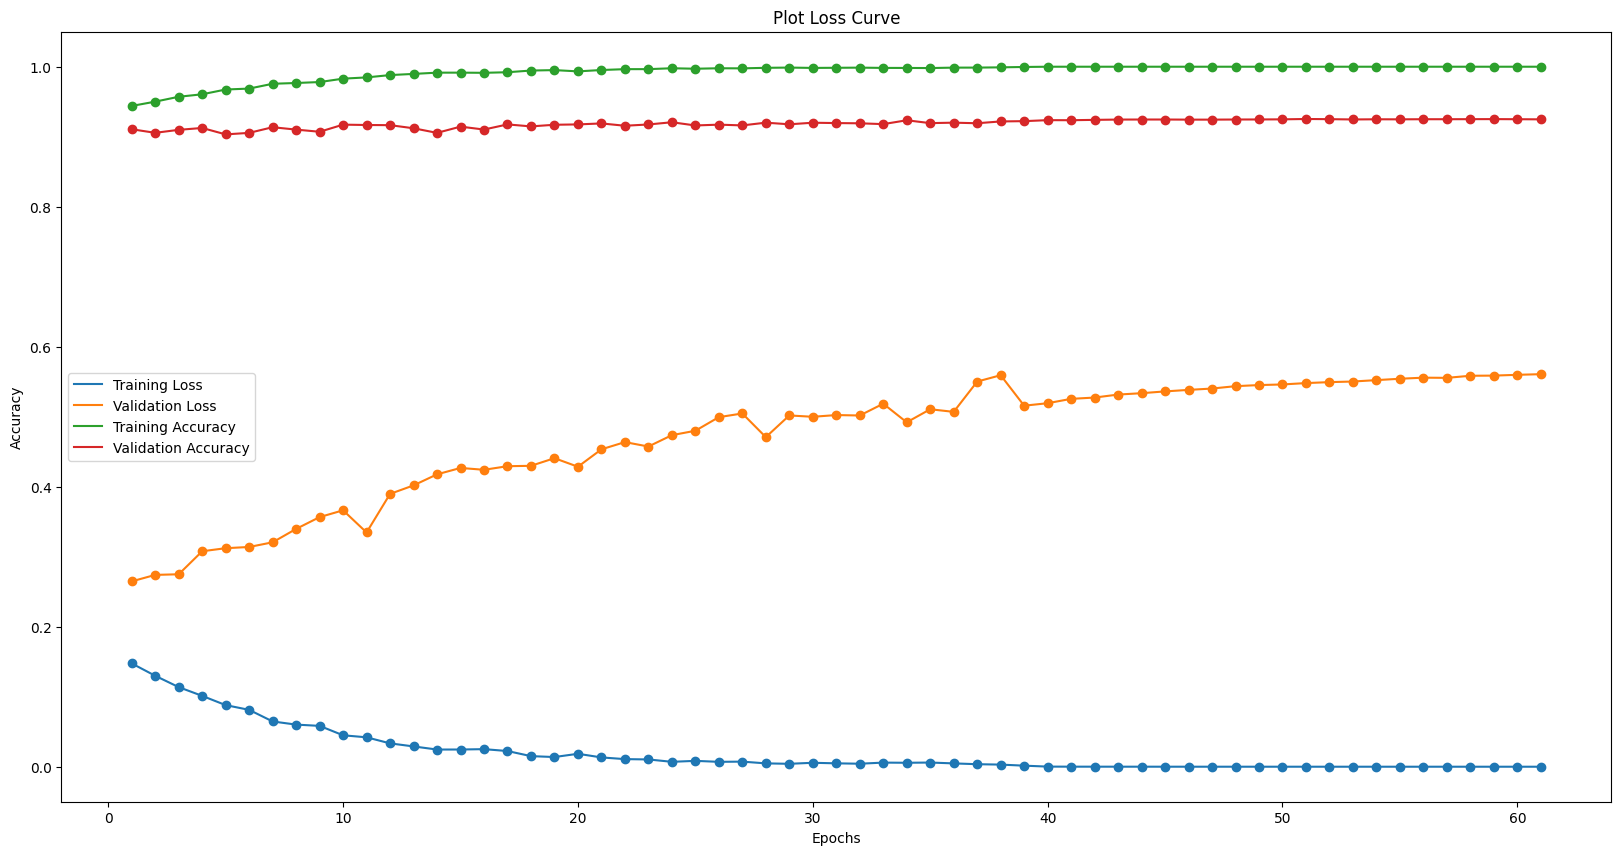

In [ ]:
plot_loss_curve(customResNetModelHistory)
plt.show()


<u><b>Observations</b></u>

Comparing CustomResNet to the baseline model, we can see that the CustomResNet model is very good compared to the baseline in terms of both training and validation accuracy. However, the issue is that the validation loss function increase over epochs. This suggest that improvements need to be made to reduce the validation loss.

We also note that the model is able to be very good at a low epochs and not become too overfit [Not overfitted easily as epochs is very high before Early Stopping kicks in]


##### Training CustomResNet model with Data Augmentation


In [56]:
tf.keras.backend.clear_session()
inputs = Input(IMG_SIZE)  # Input
x = pre_processing_v1(inputs)
x = ZeroPadding2D((3, 3))(x)
x = Conv2D(64, kernel_size=7, strides=2, padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPool2D(pool_size=3, strides=2, padding='same')(x)
block_layers = [1, 1, 1, 1]
filter_size = 64
for i in range(4):
    if i == 0:
        # For sub-block 1 Residual/Convolutional block not needed
        for j in range(block_layers[i]):
            x = identity_block(x, filter_size)
    else:
        # One Residual/Convolutional Block followed by Identity blocks
        # The filter size will go on increasing by a factor of 2
        filter_size = filter_size*2
        x = convolutional_block(x, filter_size)
        for j in range(block_layers[i] - 1):
            x = identity_block(x, filter_size)
x = AveragePooling2D((2, 2), padding='same')(x)
x = Flatten()(x)
x = Dense(NUM_CLASS, 'softmax')(x)
customResNetAugModel = Model(inputs=inputs, outputs=x, name="CustomResNetAug")
customResNetAugModel.compile(optimizer=SGD(learning_rate=0.01, momentum=0.9),
                             loss='categorical_crossentropy', metrics=['accuracy'])


In [57]:
customResNetAugModel.summary()


Model: "CustomResNetAug"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 normalization (Normalization)  (None, 28, 28, 28)   57          ['input_1[0][0]']                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 34, 34, 28)  0           ['normalization[3][0]']          
                                                                                                  
 conv2d (Conv2D)                (None, 17, 17, 64)   87872       ['zero_padding2d[0][0]']         
                                                                                    

In [58]:
customResNetAugModelHistory = customResNetAugModel.fit(x_train_aug, y_train, epochs=100,
                                                       validation_data=(x_val, y_val), batch_size=BATCH_SIZE, callbacks=EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True))


Epoch 1/100
750/750 [==============================] - 301s 376ms/step - loss: 0.4846 - accuracy: 0.8183 - val_loss: 0.3962 - val_accuracy: 0.8562
Epoch 2/100
750/750 [==============================] - 284s 378ms/step - loss: 0.3339 - accuracy: 0.8755 - val_loss: 0.3058 - val_accuracy: 0.8878
Epoch 3/100
750/750 [==============================] - 192s 257ms/step - loss: 0.2815 - accuracy: 0.8932 - val_loss: 0.3163 - val_accuracy: 0.8837
Epoch 4/100
750/750 [==============================] - 543s 725ms/step - loss: 0.2458 - accuracy: 0.9071 - val_loss: 0.3008 - val_accuracy: 0.8907
Epoch 5/100
750/750 [==============================] - 708s 945ms/step - loss: 0.2190 - accuracy: 0.9162 - val_loss: 0.2796 - val_accuracy: 0.8981
Epoch 6/100
750/750 [==============================] - 1004s 1s/step - loss: 0.1955 - accuracy: 0.9254 - val_loss: 0.3017 - val_accuracy: 0.8934
Epoch 7/100
750/750 [==============================] - 770s 1s/step - loss: 0.1710 - accuracy: 0.9343 - val_loss: 0.2842

In [59]:
customResNetAugModelHistory = customResNetAugModelHistory.history
best_val_idx = np.argmax(customResNetAugModelHistory["val_accuracy"])
result = {}
result["Model Name"] = "customResNetAug"
result["Epochs"] = len(customResNetAugModelHistory["loss"])
result["Batch Size"] = BATCH_SIZE
result["Train Loss"] = customResNetAugModelHistory["loss"][best_val_idx]
result["Val Loss"] = customResNetAugModelHistory["val_loss"][best_val_idx]
result["Train Acc"] = customResNetAugModelHistory["accuracy"][best_val_idx]
result["Val Acc"] = customResNetAugModelHistory["val_accuracy"][best_val_idx]
result["[Train - Val] Acc"] = result["Train Acc"] - result["Val Acc"]
allResults = allResults.append(result, ignore_index=True)
result


C:\Users\Soh Hong Yu\AppData\Local\Temp\ipykernel_37932\817363994.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allResults = allResults.append(result, ignore_index=True)


{'Model Name': 'customResNetAug',
 'Epochs': 36,
 'Batch Size': 64,
 'Train Loss': 0.010412562638521194,
 'Val Loss': 0.4808880090713501,
 'Train Acc': 0.996749997138977,
 'Val Acc': 0.9122499823570251,
 '[Train - Val] Acc': 0.0845000147819519}

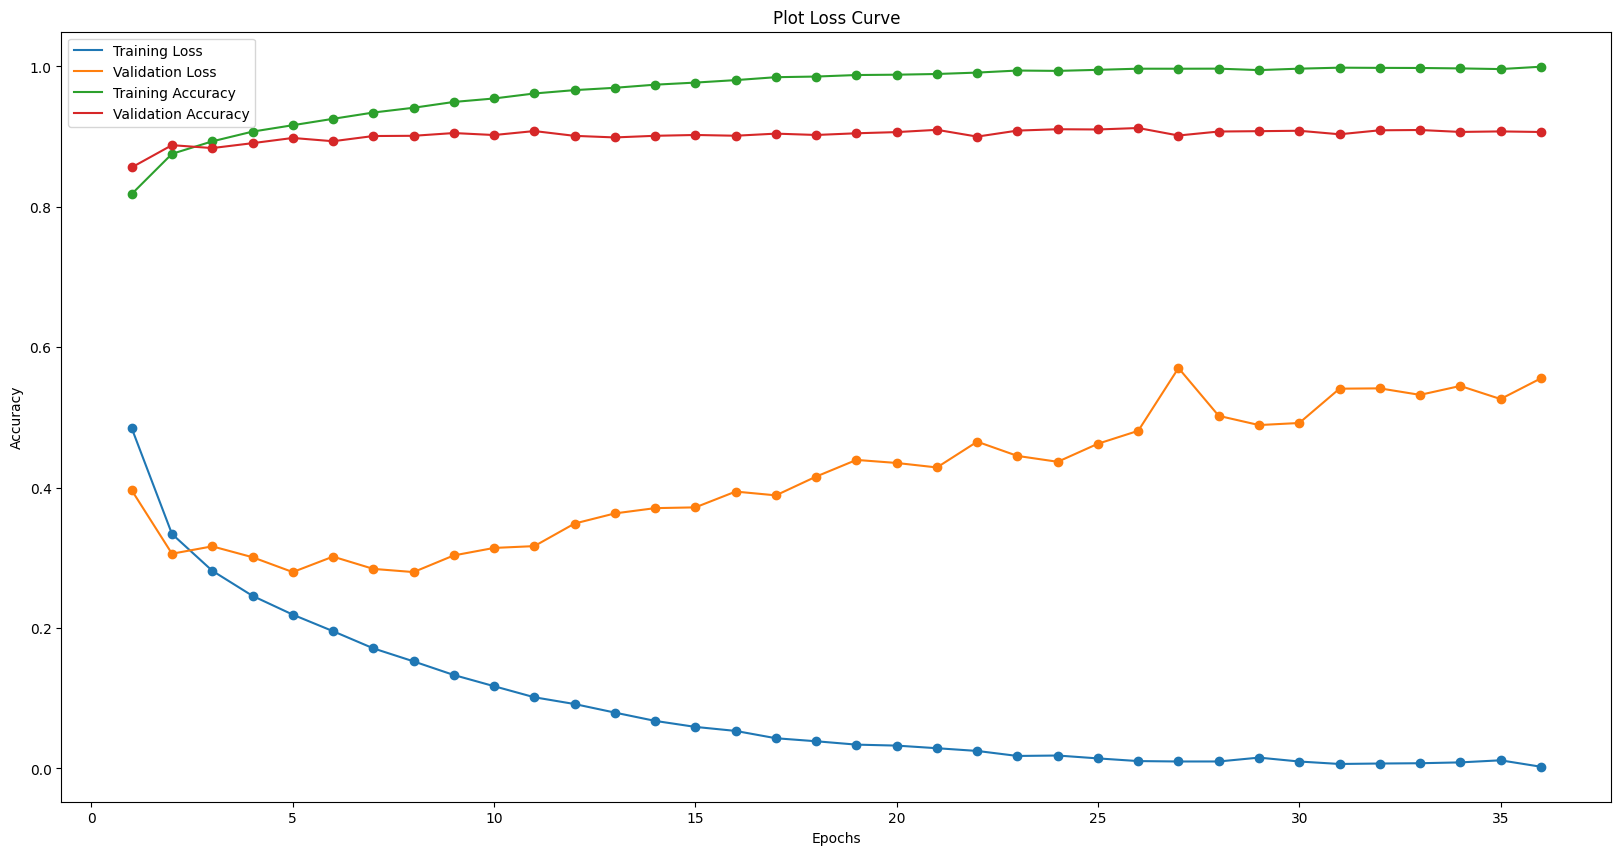

In [60]:
plot_loss_curve(customResNetAugModelHistory)
plt.show()


<u><b>Observations</b></u>

Comparing the CustomResNet with data augmentation and CustomResNet without data augmentation, we note that the validation loss decrease which means that the augmentation allowed the model to fit more to the validation set. However, despite that both accuracy dropped which suggest that training using only validation set affected some of the training.


# Model Selection

After running the different types of model, we need to decide on one of the model to be hyper tuned to be our final model


In [ ]:
allResults.sort_values(by=["Val Acc", "Train Acc"], ascending=False).style.apply(
    lambda x: [
        "background-color: red; color: white" if v else "" for v in x == x.min()]
).apply(
    lambda x: [
        "background-color: green; color: white" if v else "" for v in x == x.max()
    ]
)


,Model Name,Epochs,Batch Size,Train Loss,Val Loss,Train Acc,Val Acc,[Train - Val] Acc
4,customVGG,43,64,0.019438,0.399697,0.993583,0.926167,0.067417
6,customResNet,61,64,0.000032,0.548064,1.000000,0.925333,0.074667
7,customResNetAug,81,64,0.000022,0.639590,1.000000,0.912333,0.087667
5,customVGGAug,32,64,0.058219,0.373524,0.978750,0.908917,0.069833
2,conv2D,18,64,0.262191,0.313302,0.899833,0.891583,0.008250
0,baseline,35,64,0.314519,0.397700,0.884333,0.870333,0.014000
3,conv2DAug,24,64,0.353045,0.402542,0.864875,0.854833,0.010042
1,baselineAug,64,64,0.570761,0.616249,0.791417,0.803750,-0.012333


It seems like for this task, the custom VGG Model outperforms in terms of validation accuracy ResNet even though ResNet is the upgraded version of VGG. This is likely due to the the number of layers we set for the ResNet model. State of the art computer vision for ResNet are ResNet34, ResNet50 and ResNet101. As our implementation is a ResNet10, the reduction of layers due to time constraints limited the performance of the model itself. Therefore VGG despite being more simple it is very powerful model that also does not take too long to train too.

However, we will be tuning the customVGG model as well as the customResNet model and doing some model improvements to make the models better and finally deciding on which is the best final model to be evaluated


# Model Improvement - customVGG

We will doing the following to tune the VGG models.

- Use different regularisation methods: L1 and L2
- Use different optimizers [SGD vs Adam]
- Using the Cosine Annealing Learning Rate Scheduler
- Use Keras Tuner to do a search to fine


### Regularisation

Regularization refers to techniques that are used to calibrate machine learning models in order to minimize the adjusted loss function and prevent overfitting or underfitting.
There are 2 types of regularisation, L1 and L2. We will be trying both regularisation methods and compare which will make a better model.


##### L1 Regularisation - Lasso Regression


In [ ]:
def vgg_block_l1(num_convs, num_channels, weight_decay=0.0005):
    blk = Sequential()
    for _ in range(num_convs):
        blk.add(
            Conv2D(num_channels, kernel_size=3,
                   padding='same', activation='relu', kernel_regularizer=l1(weight_decay)))
        blk.add(
            BatchNormalization())
        blk.add(ReLU())
    blk.add(MaxPool2D(pool_size=2, strides=2))
    return blk


In [ ]:
tf.keras.backend.clear_session()
inputs = Input(IMG_SIZE)  # Input
x = pre_processing_v1(inputs)
x = vgg_block_l1(2, 32)(x)  # we are using less filters compared to VGG16
x = vgg_block_l1(2, 64)(x)
x = vgg_block_l1(3, 128)(x)
x = vgg_block_l1(3, 256)(x)
x = Flatten()(x)
x = Dense(256, 'relu')(x)
x = Dropout(0.3)(x)
x = Dense(NUM_CLASS, 'softmax')(x)
customVGGL1Model = Model(inputs=inputs, outputs=x, name="CustomVGG_L1")
customVGGL1Model.compile(optimizer=SGD(learning_rate=0.01, momentum=0.9),
                         loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
customVGGL1ModelHistory = customVGGL1Model.fit(x_train, y_train, epochs=100,
                                               validation_data=(x_val, y_val), batch_size=BATCH_SIZE, callbacks=EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True))


Epoch 1/100
750/750 [==============================] - 21s 25ms/step - loss: 10.1680 - accuracy: 0.7782 - val_loss: 4.0738 - val_accuracy: 0.5781
Epoch 2/100
750/750 [==============================] - 18s 24ms/step - loss: 2.2595 - accuracy: 0.8344 - val_loss: 1.8932 - val_accuracy: 0.8019
Epoch 3/100
750/750 [==============================] - 18s 24ms/step - loss: 1.4636 - accuracy: 0.8474 - val_loss: 1.3095 - val_accuracy: 0.8443
Epoch 4/100
750/750 [==============================] - 18s 24ms/step - loss: 1.1969 - accuracy: 0.8581 - val_loss: 1.1706 - val_accuracy: 0.8404
Epoch 5/100
750/750 [==============================] - 18s 24ms/step - loss: 1.0581 - accuracy: 0.8647 - val_loss: 1.0598 - val_accuracy: 0.8457
Epoch 6/100
750/750 [==============================] - 18s 24ms/step - loss: 1.0022 - accuracy: 0.8666 - val_loss: 1.0766 - val_accuracy: 0.8331
Epoch 7/100
750/750 [==============================] - 18s 24ms/step - loss: 0.9217 - accuracy: 0.8706 - val_loss: 0.9606 - val_a

In [ ]:
customVGGL1ModelHistory = customVGGL1ModelHistory.history
best_val_idx = np.argmax(customVGGL1ModelHistory["val_accuracy"])
result = {}
result["Model Name"] = "customVGG L1"
result["Epochs"] = len(customVGGL1ModelHistory["loss"])
result["Batch Size"] = BATCH_SIZE
result["Train Loss"] = customVGGL1ModelHistory["loss"][best_val_idx]
result["Val Loss"] = customVGGL1ModelHistory["val_loss"][best_val_idx]
result["Train Acc"] = customVGGL1ModelHistory["accuracy"][best_val_idx]
result["Val Acc"] = customVGGL1ModelHistory["val_accuracy"][best_val_idx]
result["[Train - Val] Acc"] = result["Train Acc"] - result["Val Acc"]
allResults = allResults.append(result, ignore_index=True)
result


C:\Users\Soh Hong Yu\AppData\Local\Temp\ipykernel_2760\1845154115.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allResults = allResults.append(result, ignore_index=True)


{'Model Name': 'customVGG L1',
 'Epochs': 33,
 'Batch Size': 64,
 'Train Loss': 0.610473096370697,
 'Val Loss': 0.595684826374054,
 'Train Acc': 0.8969583511352539,
 'Val Acc': 0.8993333578109741,
 '[Train - Val] Acc': -0.002375006675720215}

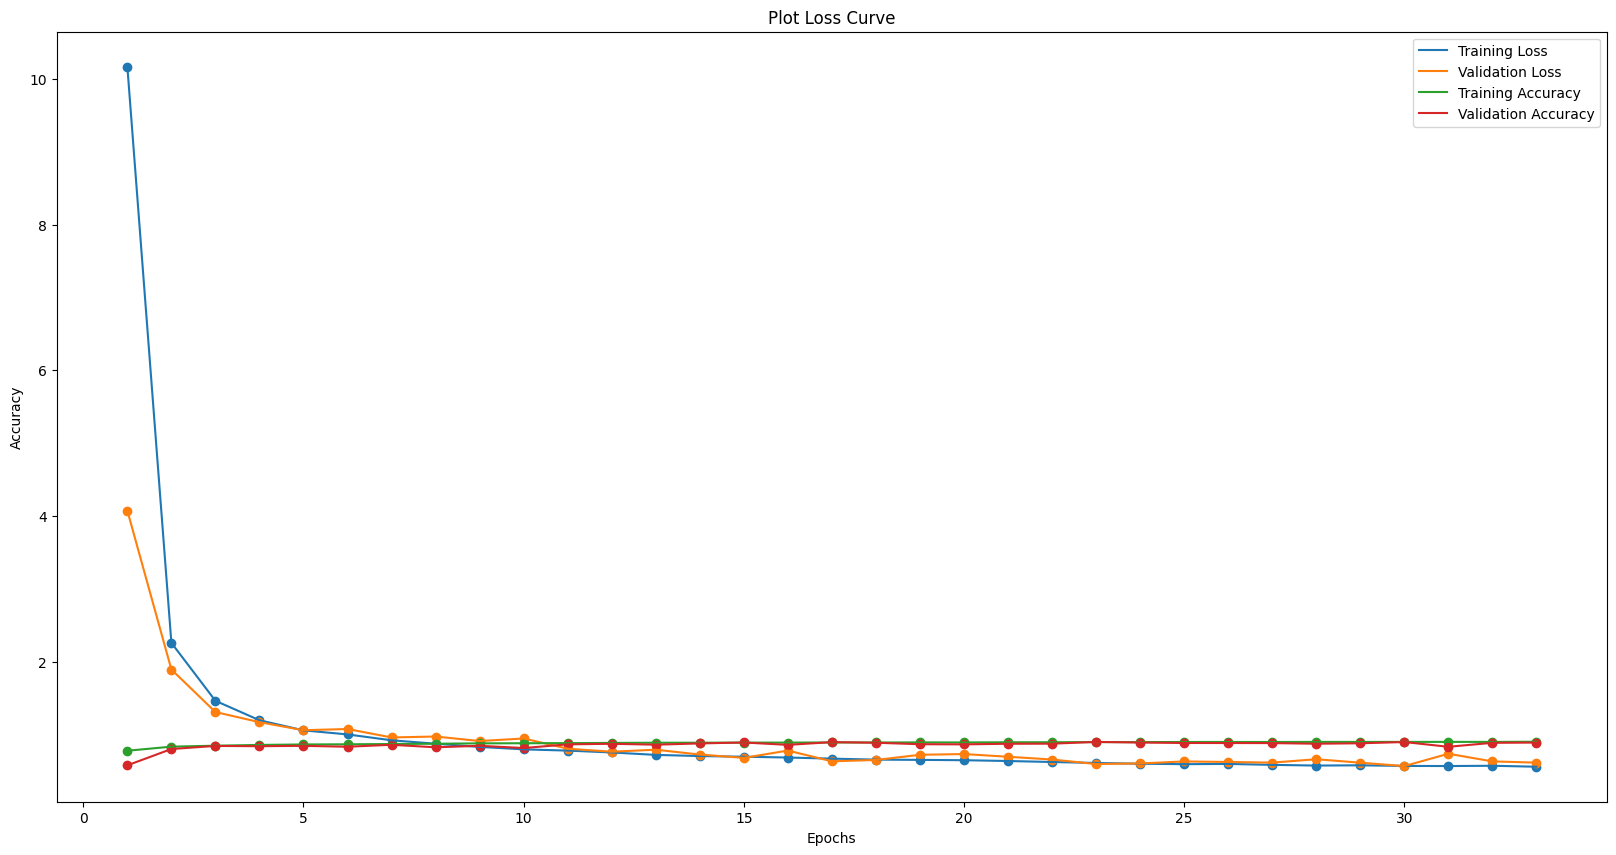

In [ ]:
plot_loss_curve(customVGGL1ModelHistory)
plt.show()


<u><b>Observations</b></u>

We note that after applying the L1 Lasso Regression Regularizers, the loss functions decrease drastically which suggest that the model is not doing well in both the training and validation data as the loss is very high. We also note that by applying the L1 Lasso Regression Regulariser, the accuracy of both training and validation decrease. Therefore for this case, L1 Lasso is not suitable and does not make model better


##### L2 Regularisation - Ridge Regression


In [ ]:
def vgg_block_l2(num_convs, num_channels, weight_decay=0.0005):
    blk = Sequential()
    for _ in range(num_convs):
        blk.add(
            Conv2D(num_channels, kernel_size=3,
                   padding='same', activation='relu', kernel_regularizer=l2(weight_decay)))
        blk.add(
            BatchNormalization())
        blk.add(ReLU())
    blk.add(MaxPool2D(pool_size=2, strides=2))
    return blk


In [ ]:
tf.keras.backend.clear_session()
inputs = Input(IMG_SIZE)  # Input
x = pre_processing_v1(inputs)
x = vgg_block_l2(2, 32)(x)  # we are using less filters compared to VGG16
x = vgg_block_l2(2, 64)(x)
x = vgg_block_l2(3, 128)(x)
x = vgg_block_l2(3, 256)(x)
x = Flatten()(x)
x = Dense(256, 'relu')(x)
x = Dropout(0.3)(x)
x = Dense(NUM_CLASS, 'softmax')(x)
customVGGL2Model = Model(inputs=inputs, outputs=x, name="CustomVGG_L2")
customVGGL2Model.compile(optimizer=SGD(learning_rate=0.01, momentum=0.9),
                         loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
customVGGL2ModelHistory = customVGGL2Model.fit(x_train, y_train, epochs=100,
                                               validation_data=(x_val, y_val), batch_size=BATCH_SIZE, callbacks=EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True))


Epoch 1/100
750/750 [==============================] - 20s 24ms/step - loss: 1.3171 - accuracy: 0.7913 - val_loss: 1.1303 - val_accuracy: 0.8454
Epoch 2/100
750/750 [==============================] - 17s 23ms/step - loss: 1.0020 - accuracy: 0.8749 - val_loss: 0.9314 - val_accuracy: 0.8814
Epoch 3/100
750/750 [==============================] - 18s 24ms/step - loss: 0.8684 - accuracy: 0.8935 - val_loss: 0.8959 - val_accuracy: 0.8724
Epoch 4/100
750/750 [==============================] - 17s 23ms/step - loss: 0.7699 - accuracy: 0.9064 - val_loss: 0.7622 - val_accuracy: 0.9002
Epoch 5/100
750/750 [==============================] - 18s 24ms/step - loss: 0.6940 - accuracy: 0.9135 - val_loss: 0.7113 - val_accuracy: 0.8974
Epoch 6/100
750/750 [==============================] - 18s 23ms/step - loss: 0.6278 - accuracy: 0.9199 - val_loss: 0.7308 - val_accuracy: 0.8843
Epoch 7/100
750/750 [==============================] - 17s 23ms/step - loss: 0.5709 - accuracy: 0.9257 - val_loss: 0.6310 - val_ac

In [ ]:
customVGGL2ModelHistory = customVGGL2ModelHistory.history
best_val_idx = np.argmax(customVGGL2ModelHistory["val_accuracy"])
result = {}
result["Model Name"] = "customVGG L2"
result["Epochs"] = len(customVGGL2ModelHistory["loss"])
result["Batch Size"] = BATCH_SIZE
result["Train Loss"] = customVGGL2ModelHistory["loss"][best_val_idx]
result["Val Loss"] = customVGGL2ModelHistory["val_loss"][best_val_idx]
result["Train Acc"] = customVGGL2ModelHistory["accuracy"][best_val_idx]
result["Val Acc"] = customVGGL2ModelHistory["val_accuracy"][best_val_idx]
result["[Train - Val] Acc"] = result["Train Acc"] - result["Val Acc"]
allResults = allResults.append(result, ignore_index=True)
result


C:\Users\Soh Hong Yu\AppData\Local\Temp\ipykernel_2760\2854401553.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allResults = allResults.append(result, ignore_index=True)


{'Model Name': 'customVGG L2',
 'Epochs': 39,
 'Batch Size': 64,
 'Train Loss': 0.2872936725616455,
 'Val Loss': 0.4220990538597107,
 'Train Acc': 0.9633749723434448,
 'Val Acc': 0.9240833520889282,
 '[Train - Val] Acc': 0.0392916202545166}

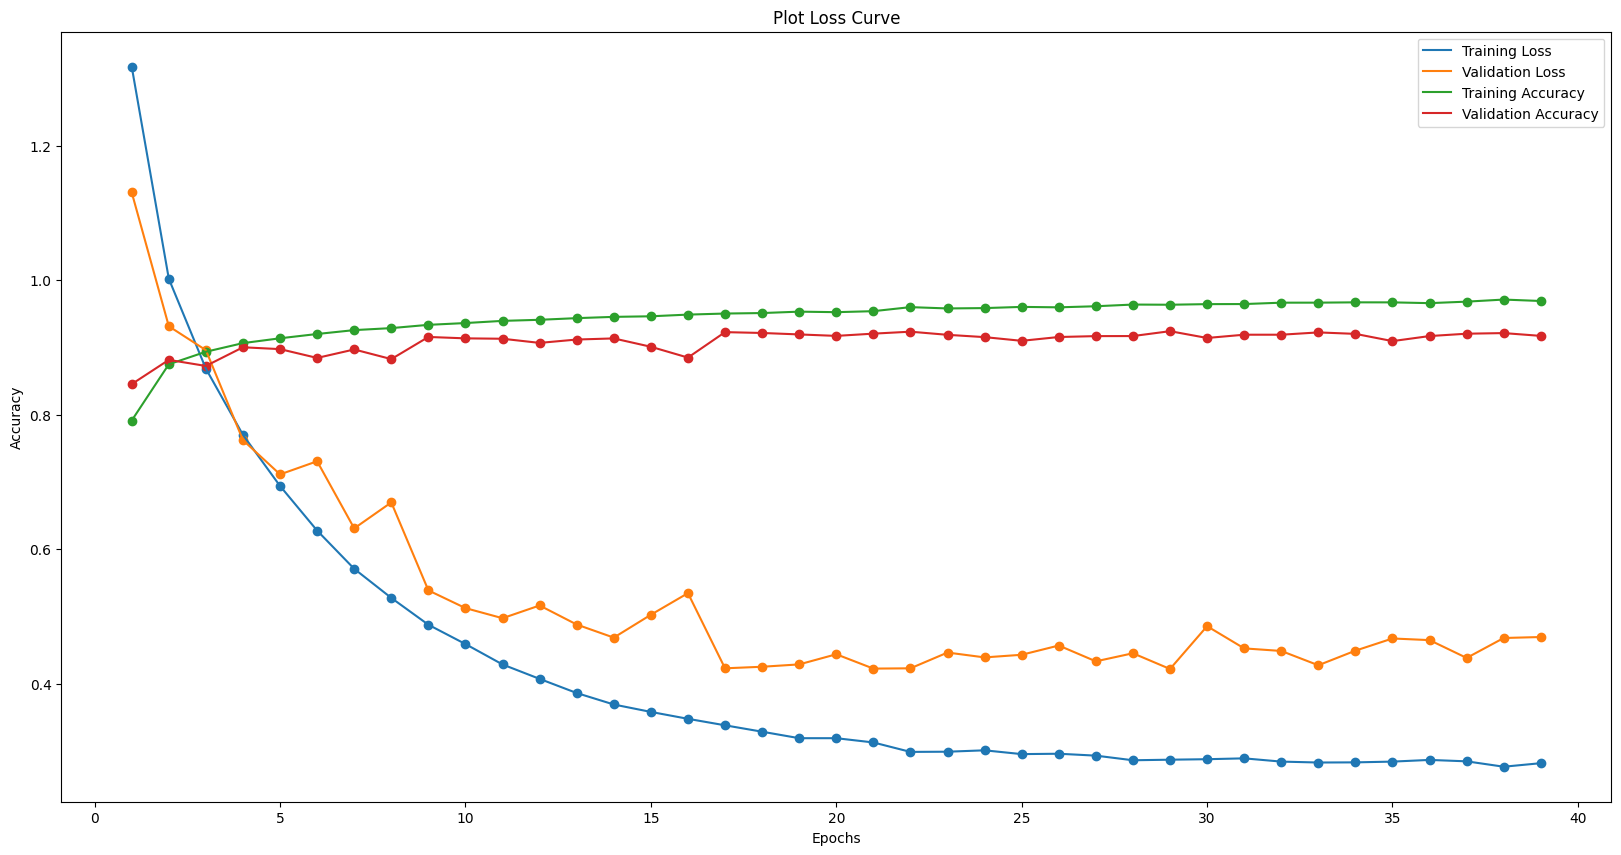

In [ ]:
plot_loss_curve(customVGGL2ModelHistory)
plt.show()


<u><b>Observations</b></u>

We observed that by applying the L2 Ridge Regression method of regularisation, the accuracy of both training data and validation data has increase slightly. The number of epochs before Early Stopping is also very high which means it is unlikely to overfit. This is compared to the

For this case, as L2 has a higher accuracy for both training and validation as well as a low loss value compared to L1 and by apply the L2 regulariser, the model's performance increased. Therefore, we will be using L2 regularisers!


### Optimizers

As mentioned there are 2 types of optimizers that is commonly used, we will be looking and testing the difference and making sure that SGD performs better both theoretically and practically.


##### Stochastic Gradient Descent


In [ ]:
tf.keras.backend.clear_session()
inputs = Input(IMG_SIZE)  # Input
x = pre_processing_v1(inputs)
x = vgg_block_l2(2, 32)(x)  # we are using less filters compared to VGG16
x = vgg_block_l2(2, 64)(x)
x = vgg_block_l2(3, 128)(x)
x = vgg_block_l2(3, 256)(x)
x = Flatten()(x)
x = Dense(256, 'relu')(x)
x = Dropout(0.3)(x)
x = Dense(NUM_CLASS, 'softmax')(x)
customVGGSGDModel = Model(inputs=inputs, outputs=x, name="CustomVGG_SGD")
customVGGSGDModel.compile(optimizer=SGD(learning_rate=0.01, momentum=0.9),
                          loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
customVGGSGDModelHistory = customVGGSGDModel.fit(x_train, y_train, epochs=100,
                                                 validation_data=(x_val, y_val), batch_size=BATCH_SIZE, callbacks=EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True))


Epoch 1/100
750/750 [==============================] - 20s 24ms/step - loss: 1.3412 - accuracy: 0.7916 - val_loss: 1.1313 - val_accuracy: 0.8431
Epoch 2/100
750/750 [==============================] - 17s 23ms/step - loss: 1.0220 - accuracy: 0.8770 - val_loss: 0.9534 - val_accuracy: 0.8835
Epoch 3/100
750/750 [==============================] - 17s 23ms/step - loss: 0.8929 - accuracy: 0.8942 - val_loss: 0.8794 - val_accuracy: 0.8867
Epoch 4/100
750/750 [==============================] - 17s 23ms/step - loss: 0.7890 - accuracy: 0.9064 - val_loss: 0.7973 - val_accuracy: 0.8905
Epoch 5/100
750/750 [==============================] - 17s 23ms/step - loss: 0.7080 - accuracy: 0.9154 - val_loss: 0.7897 - val_accuracy: 0.8702
Epoch 6/100
750/750 [==============================] - 17s 23ms/step - loss: 0.6409 - accuracy: 0.9212 - val_loss: 0.7369 - val_accuracy: 0.8797
Epoch 7/100
750/750 [==============================] - 17s 23ms/step - loss: 0.5865 - accuracy: 0.9261 - val_loss: 0.6225 - val_ac

In [ ]:
customVGGSGDModelHistory = customVGGSGDModelHistory.history
best_val_idx = np.argmax(customVGGSGDModelHistory["val_accuracy"])
result = {}
result["Model Name"] = "customVGG SGD"
result["Epochs"] = len(customVGGSGDModelHistory["loss"])
result["Batch Size"] = BATCH_SIZE
result["Train Loss"] = customVGGSGDModelHistory["loss"][best_val_idx]
result["Val Loss"] = customVGGSGDModelHistory["val_loss"][best_val_idx]
result["Train Acc"] = customVGGSGDModelHistory["accuracy"][best_val_idx]
result["Val Acc"] = customVGGSGDModelHistory["val_accuracy"][best_val_idx]
result["[Train - Val] Acc"] = result["Train Acc"] - result["Val Acc"]
allResults = allResults.append(result, ignore_index=True)
result


C:\Users\Soh Hong Yu\AppData\Local\Temp\ipykernel_2760\2655392128.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allResults = allResults.append(result, ignore_index=True)


{'Model Name': 'customVGG SGD',
 'Epochs': 56,
 'Batch Size': 64,
 'Train Loss': 0.2754226624965668,
 'Val Loss': 0.4603902995586395,
 'Train Acc': 0.971666693687439,
 'Val Acc': 0.9254999756813049,
 '[Train - Val] Acc': 0.04616671800613403}

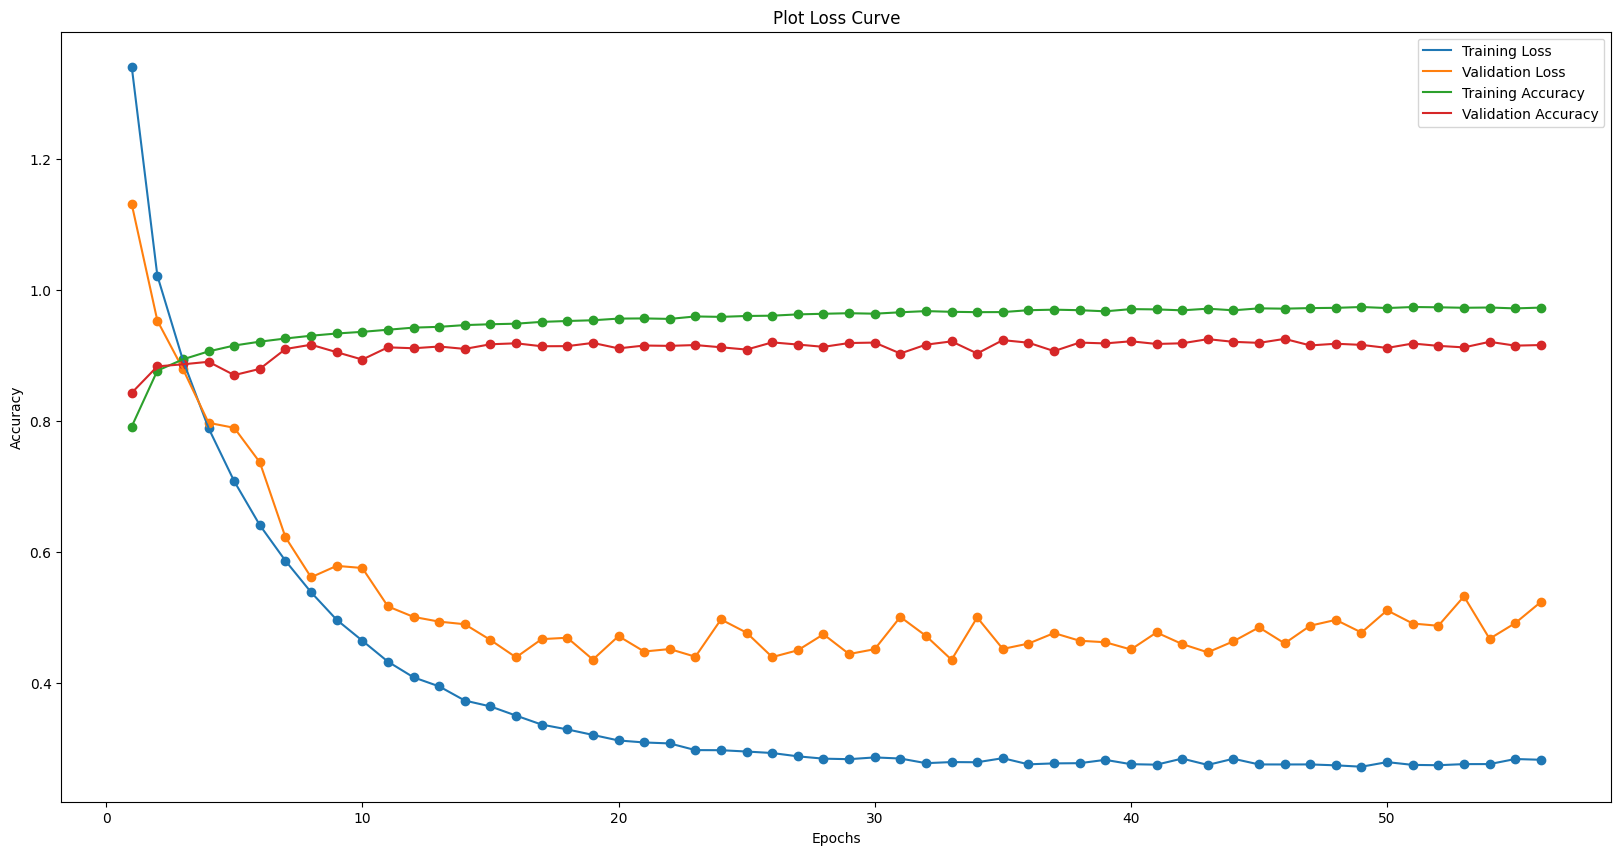

In [ ]:
plot_loss_curve(customVGGSGDModelHistory)
plt.show()


<u><b>Observations</b></u>

As we can see that the model becomes generalise as epochs increases. It seems that the SGD optimizer is able to reduce the overall loss and improve accuracy over time as what an optimizer is suppose to do


##### Adam


In [ ]:
tf.keras.backend.clear_session()
inputs = Input(IMG_SIZE)  # Input
x = pre_processing_v1(inputs)
x = vgg_block_l2(2, 32)(x)  # we are using less filters compared to VGG16
x = vgg_block_l2(2, 64)(x)
x = vgg_block_l2(3, 128)(x)
x = vgg_block_l2(3, 256)(x)
x = Flatten()(x)
x = Dense(256, 'relu')(x)
x = Dropout(0.3)(x)
x = Dense(NUM_CLASS, 'softmax')(x)
customVGGAdamModel = Model(inputs=inputs, outputs=x, name="CustomVGG_Adam")
customVGGAdamModel.compile(optimizer=Adam(learning_rate=0.01),
                           loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
customVGGAdamModelHistory = customVGGAdamModel.fit(x_train, y_train, epochs=100,
                                                   validation_data=(x_val, y_val), batch_size=BATCH_SIZE, callbacks=EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True))


Epoch 1/100
750/750 [==============================] - 20s 24ms/step - loss: 1.9327 - accuracy: 0.7395 - val_loss: 1.4253 - val_accuracy: 0.6770
Epoch 2/100
750/750 [==============================] - 17s 23ms/step - loss: 1.1375 - accuracy: 0.8115 - val_loss: 1.5565 - val_accuracy: 0.6328
Epoch 3/100
750/750 [==============================] - 17s 23ms/step - loss: 0.8518 - accuracy: 0.8286 - val_loss: 0.9395 - val_accuracy: 0.7751
Epoch 4/100
750/750 [==============================] - 17s 22ms/step - loss: 0.7927 - accuracy: 0.8326 - val_loss: 1.1907 - val_accuracy: 0.7113
Epoch 5/100
750/750 [==============================] - 17s 22ms/step - loss: 0.7538 - accuracy: 0.8353 - val_loss: 2.0343 - val_accuracy: 0.5506
Epoch 6/100
750/750 [==============================] - 17s 22ms/step - loss: 0.7133 - accuracy: 0.8389 - val_loss: 0.9874 - val_accuracy: 0.7458
Epoch 7/100
750/750 [==============================] - 17s 22ms/step - loss: 0.6649 - accuracy: 0.8471 - val_loss: 0.7647 - val_ac

In [ ]:
customVGGAdamModelHistory = customVGGAdamModelHistory.history
best_val_idx = np.argmax(customVGGAdamModelHistory["val_accuracy"])
result = {}
result["Model Name"] = "customVGG Adam"
result["Epochs"] = len(customVGGAdamModelHistory["loss"])
result["Batch Size"] = BATCH_SIZE
result["Train Loss"] = customVGGAdamModelHistory["loss"][best_val_idx]
result["Val Loss"] = customVGGAdamModelHistory["val_loss"][best_val_idx]
result["Train Acc"] = customVGGAdamModelHistory["accuracy"][best_val_idx]
result["Val Acc"] = customVGGAdamModelHistory["val_accuracy"][best_val_idx]
result["[Train - Val] Acc"] = result["Train Acc"] - result["Val Acc"]
allResults = allResults.append(result, ignore_index=True)
result


C:\Users\Soh Hong Yu\AppData\Local\Temp\ipykernel_2760\1521673524.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allResults = allResults.append(result, ignore_index=True)


{'Model Name': 'customVGG Adam',
 'Epochs': 21,
 'Batch Size': 64,
 'Train Loss': 0.5726111531257629,
 'Val Loss': 0.5712665319442749,
 'Train Acc': 0.85916668176651,
 'Val Acc': 0.8692499995231628,
 '[Train - Val] Acc': -0.010083317756652832}

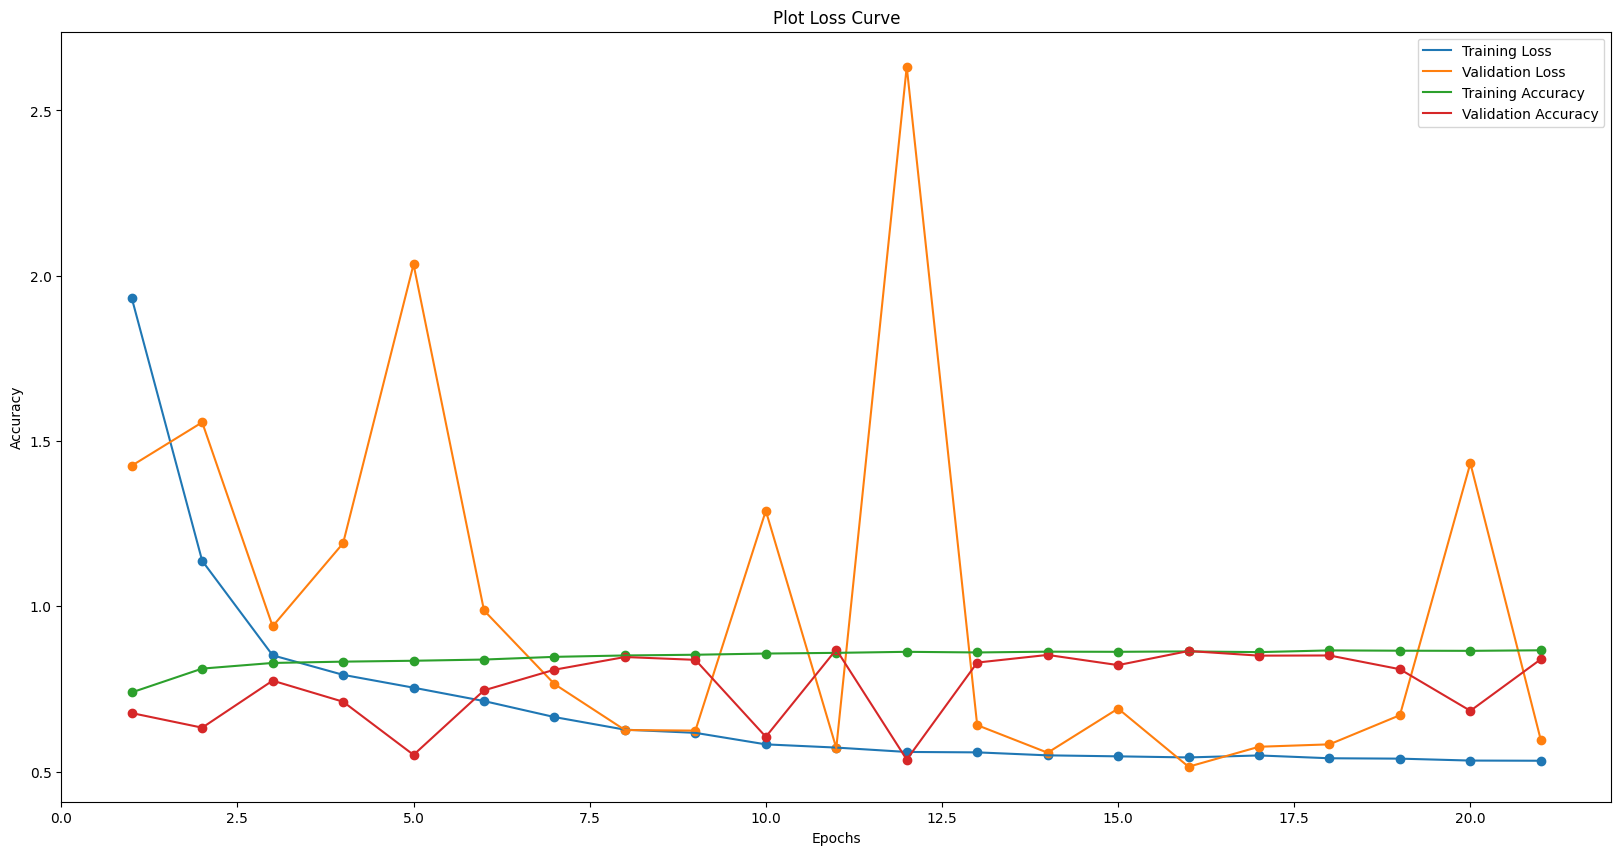

In [ ]:
plot_loss_curve(customVGGAdamModelHistory)
plt.show()


<u><b>Observations</b></u>

An optimizer is allowed to modify each weights and minimize the loss function. This will reduce overall loss and improve accuracy. However, we can see from using the Adam optimizer, even though the accuracy loss is low, the validation loss is out of this world and is very bad as it does not fit well with the model. We can also see it affecting the validation accuracy too. Even though the model is very good at predicting the training data, when it comes to the validation data, there are drastic drop in performance which suggest that by using the Adam optimizer, it has made the model overfit to the training data despite having L2 Regularisation applied to it which reduces overfitting.

In Summary, we will be using the SGD optimizer as it very good at improving the accuracy and reducing overall loss compared to Adam and it has been a good choice since the begin to be using SGD as the optimizer. This suggest that both theoretically and practically SGD is better for this image classification problem.


### Keras Tuner

KerasTuner is an easy-to-use, scalable hyperparameter optimization framework that solves the pain points of hyperparameter search. Easily configure your search space with a define-by-run syntax, then leverage one of the available search algorithms to find the best hyperparameter values for your models. KerasTuner comes with Bayesian Optimization, Hyperband, and Random Search algorithms built-in, and is also designed to be easy for researchers to extend in order to experiment with new search algorithms.


To use keras tuner effectively, we will need to make the model and store it inside of a function


In [ ]:
steps_per_epoch = np.ceil(len(x_train) / BATCH_SIZE)


In [ ]:
def vgg_block_l2(num_convs, num_channels, weight_decay=0.0005):
    blk = Sequential()
    for _ in range(num_convs):
        blk.add(
            Conv2D(num_channels, kernel_size=3,
                   padding='same', activation='relu', kernel_regularizer=l2(weight_decay)))
        blk.add(
            BatchNormalization())
        blk.add(ReLU())
    blk.add(MaxPool2D(pool_size=2, strides=2))
    return blk


In [ ]:
def tune_vgg_model(hp):
    weight_decay = hp.Float("weight_decay", min_value=3e-4,
                            max_value=1e-2, sampling="log")
    learning_rate = hp.Float(
        "learning_rate", min_value=1e-3, max_value=1e-1, sampling="log")
    scheduler = tf.keras.optimizers.schedules.CosineDecay(
        learning_rate, 50 * steps_per_epoch)
    optimizer = SGD(learning_rate=scheduler, momentum=0.9)
    inputs = Input(IMG_SIZE)
    x = pre_processing_v1(inputs)
    x = vgg_block_l2(2, 32, weight_decay=weight_decay)(x)
    x = vgg_block_l2(2, 64, weight_decay=weight_decay)(x)
    x = vgg_block_l2(3, 128, weight_decay=weight_decay)(x)
    x = vgg_block_l2(3, 256, weight_decay=weight_decay)(x)
    x = Flatten()(x)
    x = Dense(256, 'relu')(x)
    x = Dropout(0.3)(x)
    x = Dense(NUM_CLASS, 'softmax')(x)
    model = Model(inputs=inputs, outputs=x)
    model.compile(optimizer=optimizer,
                  loss='categorical_crossentropy', metrics=['accuracy'])
    return model


In [ ]:
VGGTuner = kt.Hyperband(tune_vgg_model, objective="val_accuracy",
                        max_epochs=50, overwrite=True, project_name="fashion_vgg")


In [ ]:
VGGTuner.search(
    x_train, y_train, validation_data=(x_val, y_val), epochs=60, batch_size=BATCH_SIZE, callbacks=[
        EarlyStopping(monitor="val_accuracy", patience=10,
                      restore_best_weights=True)
    ]
)
VGGTuner.results_summary(num_trials=3)


Trial 90 Complete [00h 15m 10s]
val_accuracy: 0.9337499737739563

Best val_accuracy So Far: 0.9364166855812073
Total elapsed time: 04h 23m 28s
INFO:tensorflow:Oracle triggered exit
Results summary
Results in .\fashion_vgg
Showing 3 best trials
Trial summary
Hyperparameters:
weight_decay: 0.008229251891996288
learning_rate: 0.0035152323387747804
tuner/epochs: 50
tuner/initial_epoch: 0
tuner/bracket: 0
tuner/round: 0
Score: 0.9364166855812073
Trial summary
Hyperparameters:
weight_decay: 0.006534537656818744
learning_rate: 0.02987361022983302
tuner/epochs: 50
tuner/initial_epoch: 0
tuner/bracket: 0
tuner/round: 0
Score: 0.9350833296775818
Trial summary
Hyperparameters:
weight_decay: 0.009550786463434349
learning_rate: 0.02317351776944327
tuner/epochs: 50
tuner/initial_epoch: 0
tuner/bracket: 0
tuner/round: 0
Score: 0.9337499737739563


# Model Improvement - customResNet

We will doing the following to tune the ResNet models.

- Using the Cosine Annealing Learning Rate Scheduler
- Use Keras Tuner to do a search to fine


In [ ]:
def convolutional_block(x, filter, weight_decay=0.005):
    x_skip = x
    x = Conv2D(filter, (3, 3), padding='same', strides=(
        2, 2), kernel_regularizer=l2(weight_decay))(x)
    x = BatchNormalization(axis=3)(x)
    x = Activation('relu')(x)
    x = Conv2D(filter, (3, 3), padding='same')(x)
    x = BatchNormalization(axis=3)(x)
    x_skip = Conv2D(filter, (1, 1), strides=(2, 2),
                    kernel_regularizer=l2(weight_decay))(x_skip)
    x = Add()([x, x_skip])
    x = Activation('relu')(x)
    return x


In [ ]:
def identity_block(x, filter, weight_decay=0.005):
    x_skip = x
    x = Conv2D(filter, (3, 3), padding='same',
               kernel_regularizer=l2(weight_decay))(x)
    x = BatchNormalization(axis=3)(x)
    x = Activation('relu')(x)
    x = Conv2D(filter, (3, 3), padding='same',
               kernel_regularizer=l2(weight_decay))(x)
    x = BatchNormalization(axis=3)(x)
    x = Add()([x, x_skip])
    x = Activation('relu')(x)
    return x


### Keras Tuner

KerasTuner is an easy-to-use, scalable hyperparameter optimization framework that solves the pain points of hyperparameter search. Easily configure your search space with a define-by-run syntax, then leverage one of the available search algorithms to find the best hyperparameter values for your models. KerasTuner comes with Bayesian Optimization, Hyperband, and Random Search algorithms built-in, and is also designed to be easy for researchers to extend in order to experiment with new search algorithms.


In [ ]:
def tune_resnet_model(hp):
    weight_decay = hp.Float("weight_decay", min_value=3e-4,
                            max_value=1e-2, sampling="log")
    learning_rate = hp.Float(
        "learning_rate", min_value=1e-3, max_value=1e-1, sampling="log")
    scheduler = tf.keras.optimizers.schedules.CosineDecay(
        learning_rate, 50 * steps_per_epoch)
    optimizer = SGD(learning_rate=scheduler, momentum=0.9)
    inputs = Input(IMG_SIZE)
    x = pre_processing_v1(inputs)
    x = ZeroPadding2D((3, 3))(x)
    x = Conv2D(64, kernel_size=7, strides=2, padding='same',
               kernel_regularizer=l2(weight_decay))(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPool2D(pool_size=3, strides=2, padding='same')(x)
    block_layers = [1, 1, 1, 1]
    filter_size = 64
    for i in range(4):
        if i == 0:
            # For sub-block 1 Residual/Convolutional block not needed
            for j in range(block_layers[i]):
                x = identity_block(x, filter_size, weight_decay)
        else:
            # One Residual/Convolutional Block followed by Identity blocks
            # The filter size will go on increasing by a factor of 2
            filter_size = filter_size*2
            x = convolutional_block(x, filter_size)
            for j in range(block_layers[i] - 1):
                x = identity_block(x, filter_size, weight_decay)
    x = AveragePooling2D((2, 2), padding='same')(x)
    x = Flatten()(x)
    x = Dense(NUM_CLASS, 'softmax')(x)
    model = Model(inputs=inputs, outputs=x)
    model.compile(optimizer=optimizer,
                  loss='categorical_crossentropy', metrics=['accuracy'])
    return model


In [ ]:
ResNetTuner = kt.Hyperband(tune_resnet_model, objective="val_accuracy",
                           max_epochs=50, overwrite=True, project_name="fashion_resnet")


In [ ]:
ResNetTuner.search(
    x_train, y_train, validation_data=(x_val, y_val), epochs=60, batch_size=BATCH_SIZE, callbacks=[
        EarlyStopping(monitor="val_accuracy", patience=10,
                      restore_best_weights=True)
    ]
)
ResNetTuner.results_summary(num_trials=3)


Trial 90 Complete [00h 20m 46s]
val_accuracy: 0.9224166870117188

Best val_accuracy So Far: 0.9243333339691162
Total elapsed time: 09h 41m 13s
INFO:tensorflow:Oracle triggered exit
Results summary
Results in .\fashion_resnet
Showing 3 best trials
Trial summary
Hyperparameters:
weight_decay: 0.0017469364666108822
learning_rate: 0.02995853178427231
tuner/epochs: 50
tuner/initial_epoch: 0
tuner/bracket: 0
tuner/round: 0
Score: 0.9243333339691162
Trial summary
Hyperparameters:
weight_decay: 0.0008436048029335887
learning_rate: 0.08294903912014776
tuner/epochs: 50
tuner/initial_epoch: 0
tuner/bracket: 0
tuner/round: 0
Score: 0.9242500066757202
Trial summary
Hyperparameters:
weight_decay: 0.0019981184550969546
learning_rate: 0.0016378962306363488
tuner/epochs: 50
tuner/initial_epoch: 0
tuner/bracket: 0
tuner/round: 0
Score: 0.9225833415985107


# Tuned Model Selection

After tuning the models, we will compare both models in terms of validation accuracy. We can see that customVGG is better than customResNet model as the validation accuracy is 0.9337499737739563 while the customResNet model has a validation accuracy of 0.9243333339691162.

Therefore after careful selection consideration, we will be using the customVGG model instead of the customResNet model.


In [ ]:
vgg_model = VGGTuner.get_best_models()[0]
resnet_model = ResNetTuner.get_best_models()[0]


# Model Evaluation

Now it is time to evaluate my final model. To ensure it generalise well, We want to ensure the accuracy on the testing set consistent with that on the validation set.


### Saving model


In [ ]:
vgg_model.save('models/customVGG - Final')
resnet_model.save('models/customResNet')


INFO:tensorflow:Assets written to: models/customVGG - Final\assets


INFO:tensorflow:Assets written to: models/customVGG - Final\assets


INFO:tensorflow:Assets written to: models/customResNet\assets


INFO:tensorflow:Assets written to: models/customResNet\assets


In [ ]:
vgg_model.save('models/customVGG - Final.h5')
resnet_model.save('models/customResNet.h5')

### Initiate model after tuning and saving


In [61]:
final_model = tf.keras.models.load_model('models/customVGG - Final')

final_model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 normalization (Normalizatio  (None, 28, 28, 28)       57        
 n)                                                              
                                                                 
 sequential (Sequential)     (None, 14, 14, 32)        17600     
                                                                 
 sequential_1 (Sequential)   (None, 7, 7, 64)          55936     
                                                                 
 sequential_2 (Sequential)   (None, 3, 3, 128)         370560    
                                                                 
 sequential_3 (Sequential)   (None, 1, 1, 256)         1478400   
                                                             

### Testing Set

After training our model, we need to use the test set to test the model accuracy of the model for unseen data.


In [ ]:
final_model.evaluate(x_test, y_test)


313/313 [==============================] - 8s 13ms/step - loss: 0.5096 - accuracy: 0.9331


[0.5096258521080017, 0.9330999851226807]

<u><b>Observations</b></u>

We note that the model loss and the accuracy is very high and is quiet similar to the loss and accuracy given by the validation set. This suggest that the model is good at generalising and predicting which image is what clothing item.


In [62]:
y_pred = final_model.predict(x_test)


313/313 [==============================] - 160s 496ms/step


In [63]:
report = classification_report(
    np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1), target_names=class_labels.values()
)


In [64]:
print(report)


              precision    recall  f1-score   support

 T-shirt/top       0.87      0.88      0.88      1000
     Trouser       0.99      0.99      0.99      1000
    Pullover       0.90      0.92      0.91      1000
       Dress       0.93      0.94      0.94      1000
        Coat       0.89      0.91      0.90      1000
      Sandal       0.99      0.99      0.99      1000
       Shirt       0.81      0.78      0.80      1000
     Sneaker       0.97      0.98      0.97      1000
         Bag       0.99      0.99      0.99      1000
  Ankle boot       0.98      0.97      0.97      1000

    accuracy                           0.93     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000



We can see from the classification report that the model is very good at identifying and differentiating Trouser, Sandal and Bag but not as good as predicting T-shirt/top, pullovers and shirts. Let's do a mini error analysis and find out why.


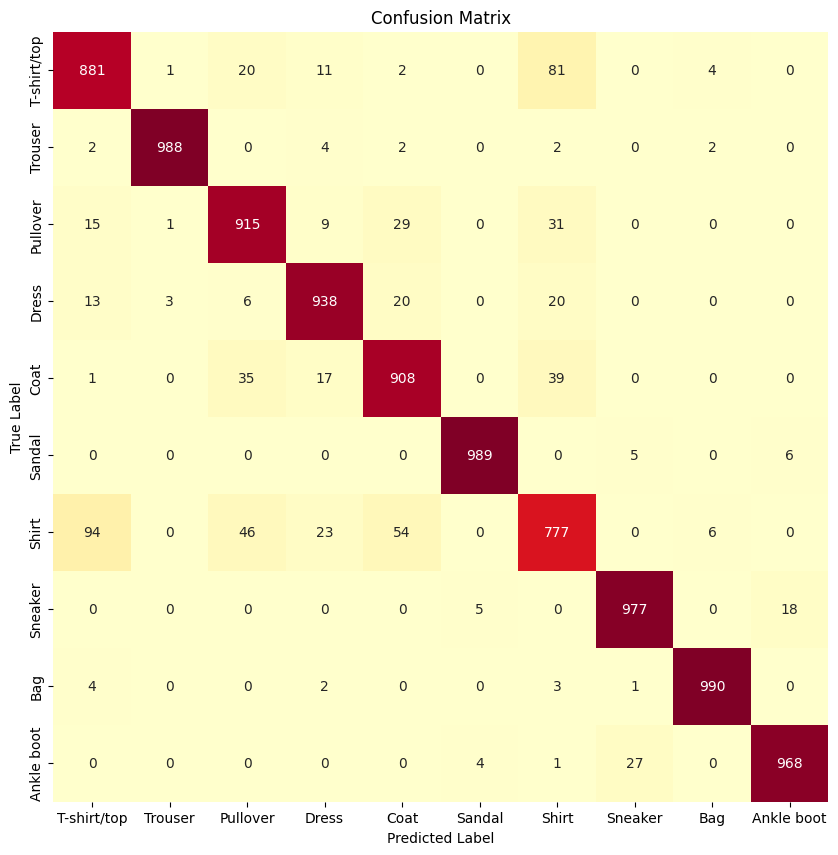

In [65]:
plt.figure(1, figsize=(10, 10))
plt.title("Confusion Matrix")
sns.heatmap(tf.math.confusion_matrix(
    np.argmax(y_test, axis=1),
    np.argmax(y_pred, axis=1),
    num_classes=10,
    dtype=tf.dtypes.int32,
    name=None
), annot=True, fmt="", cbar=False, cmap="YlOrRd", yticklabels=class_labels.values(), xticklabels=class_labels.values())
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()


<u><b>Observation</b></u>

We can see that the model is able to predict all the labels mostly correctly. However, the issue is the shirt class which is quite similar to the T-shirt/top class and other clothing items that is worn on the top. We will do a little error analysis to find out more.

### Error Analysis


In [118]:
wrong = (np.argmax(y_test, axis=1) != np.argmax(y_pred, axis=1))
x_test_wrong = x_test[wrong]
y_test_wrong = np.argmax(y_test[wrong], axis=1)
y_pred_wrong = y_pred[wrong]


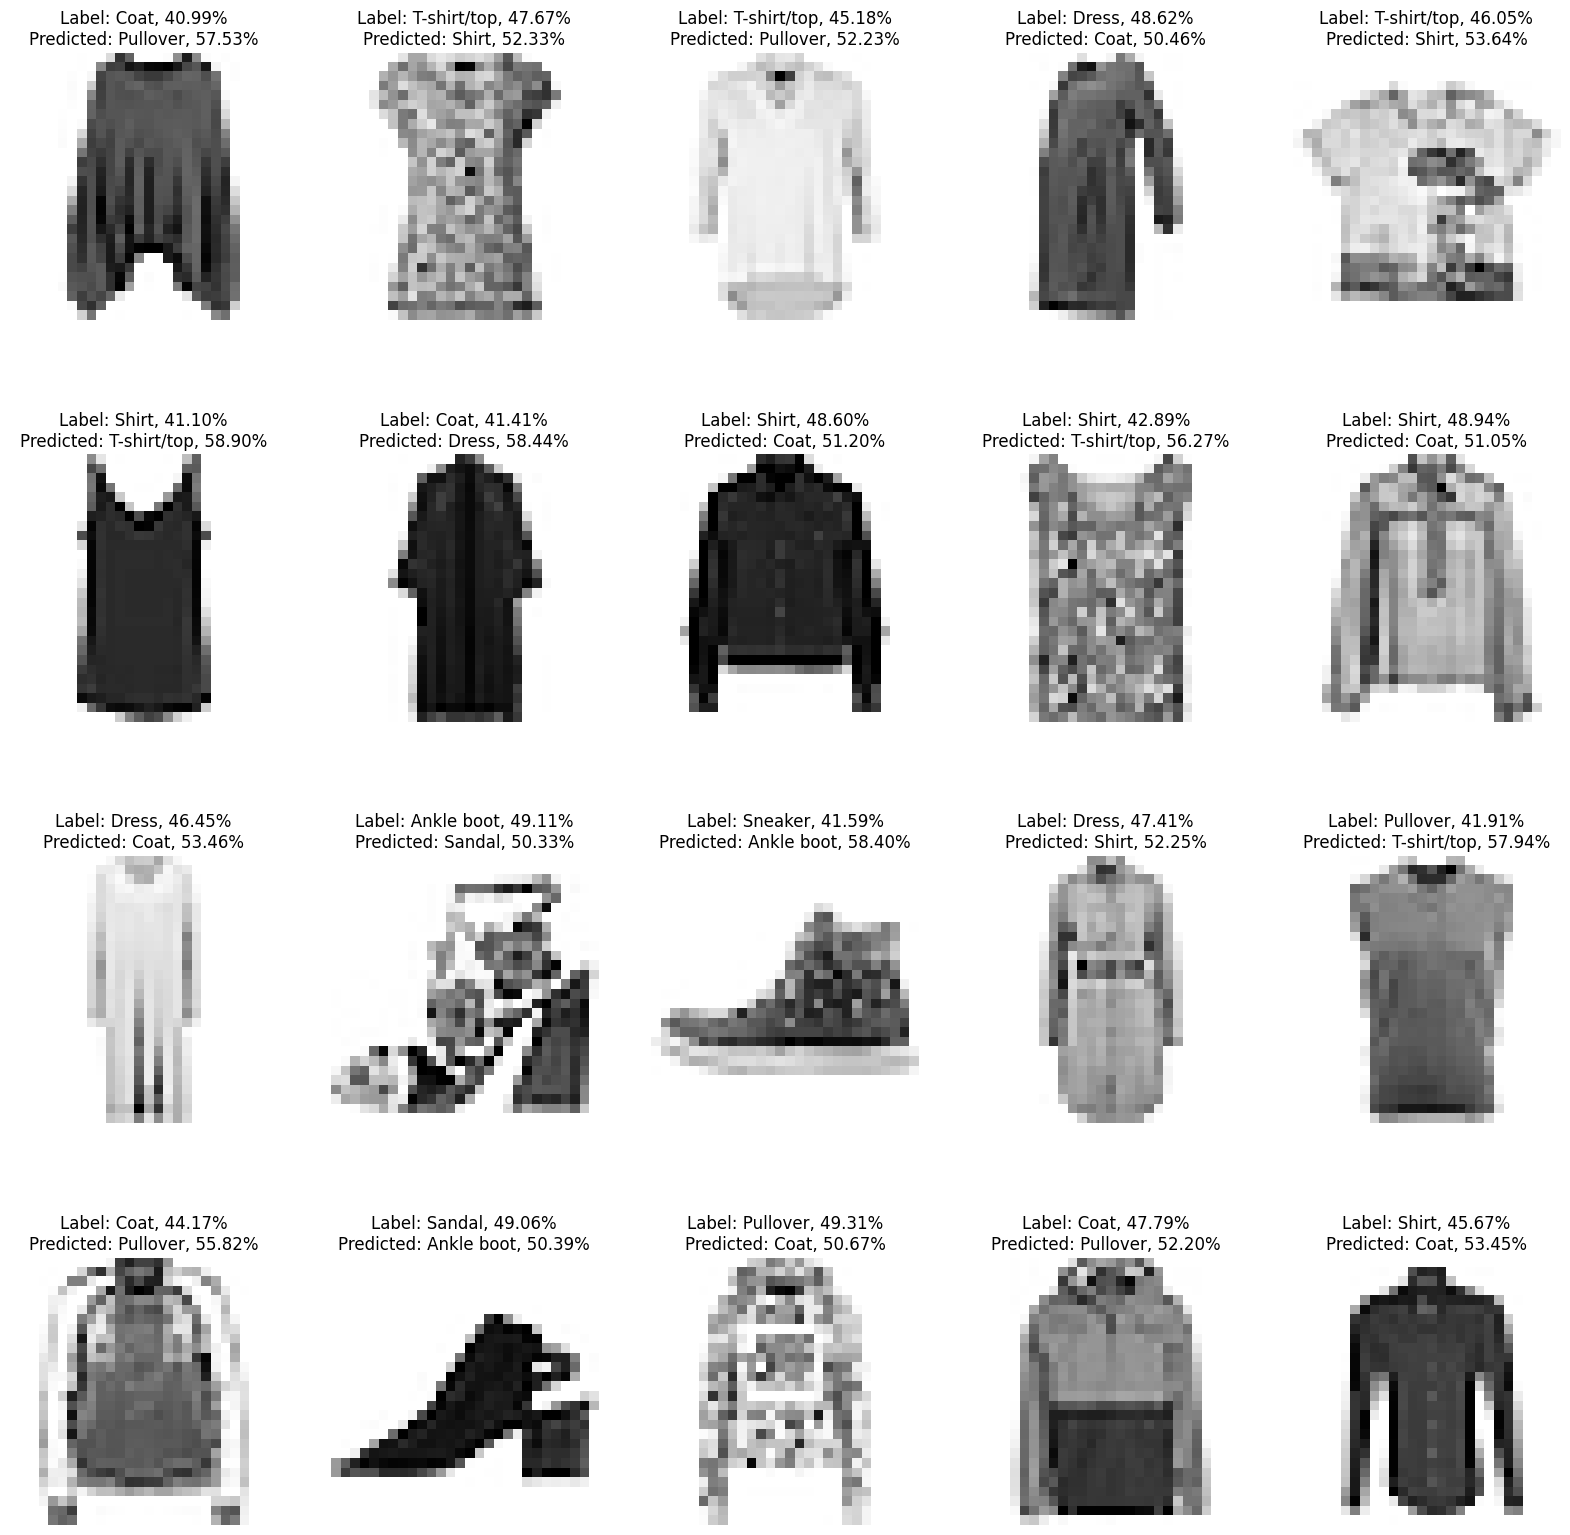

In [135]:
fig, ax = plt.subplots(4, 5, figsize=(20, 20))
existArr = []
for subplot in ax.ravel():
    idx = np.random.choice(x_test_wrong.shape[0], 1, replace=False)
    while (y_pred_wrong[idx][0][int(y_test_wrong[idx])] * 100) <= 40 or idx in existArr:
        idx = np.random.choice(x_test_wrong.shape[0], 1, replace=False)
    pred = class_labels[np.argmax(y_pred_wrong[idx])]
    subplot.axis("off")
    actual = class_labels[int(y_test_wrong[idx])]
    subplot.imshow(x_test_wrong[idx].reshape(28,28,1), cmap='Greys')
    subplot.set_title(f"""Label: {actual}, {(y_pred_wrong[idx][0][int(y_test_wrong[idx])] * 100):.2f}%
Predicted: {pred}, {(np.max(y_pred_wrong[idx]) * 100):.2f}%""")
    existArr.append(idx)


<u><b>Observations</b></u>

When we look at the examples that the model made a wrong prediction, we can identify some reasons why it is the case.

1. Low pixel resolutions makes images hard to be distinguished.
   - Example: Row 4 Column 3<br>That images looks a bunch of pixels [Due to low resolutions] and it is hard to distinguish the features
2. Similar features
   - Example: Row 4 Column 4<br>The model predicted the values of a coat and pullover wrongly. This is likely due to both coat and pullover having long sleeves which we identified during our EDA could be a problem faced by the AI model.

Therefore, it appears that the model's mistakes are reasonable. In fact, real human performance was conducted by Zalando [Dataset creator] was only 83.5% accuracy. This shows that the model is performing quite well.


##### Comparing final_model VS other people's model

Based on PapersWithCode.com, our final model is ranked 11th out of the 13 models [Not inclusive of ours].
[https://paperswithcode.com/sota/image-classification-on-fashion-mnist]


# Model Visualisation


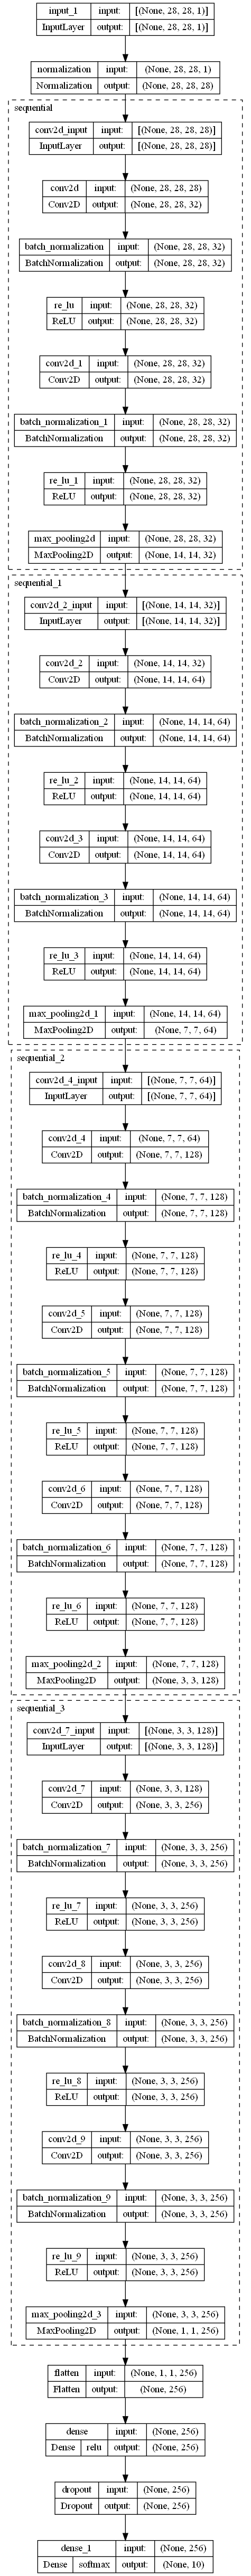

In [ ]:
tf.keras.utils.plot_model(final_model, show_shapes=True,
                          expand_nested=True, show_layer_activations=True)


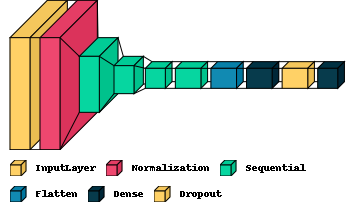

In [ ]:
visualkeras.layered_view(final_model,legend=True, to_file="vgg.png")

# Summary

In summary, I experimented with various models, and found that a custom built CNN with batch normalization and data augmentation to try to reduce overfitting. More room for improvement can be made to the model like increasing the number of layers, using different learning rates and optimizers like RMSProp and Ftrl can be done to make model better.
